# Overview of `mobile-env:smart-city` for Smart City Simulation and Digital Twin Synchronization

`mobile-env:smart-city` is an open-source Python environment designed for simulating decentralized Metaverse environments. It provides a flexible and extendable platform for experimenting resource optimization with reinforcement learning (RL) and control algorithms in dynamic environments.

By enabling simulations with moving users, stationary sensors, and flexible configurations, `mobile-env:smart-city` allows the users to model realistic scenarios, assess the efficiency of resource utilization and fine-tune algorithms for real-time synchronization between a digital twin and the actual environment.

## Key Features of `mobile-env:smart-city`

* **Flexibility and Customizability**:
   - `mobile-env:smart-city` is written entirely in Python, making it easy to modify and extend.
   - The environment allows the simulation of a smart city scenario with mobile users (UEs), stationary sensors and a single base station (BS).
   - The number of UEs, sensors, their movement patterns, communication properties and the structure of the network can all be customized to suit a variety of experimental needs.

* **Compatibility with Gymnasium**:
   - `mobile-env:smart-city` adheres to the [Gymnasium](https://gymnasium.farama.org/) (formerly [OpenAI Gym](https://gym.openai.com/)) interface. This ensures compatibility with most reinforcement learning libraries and frameworks, allowing users to experiment with different RL algorithms with minimal integration effort.
   - Using the Gymnasium interface allows easy integration with popular RL libraries such as Stable-Baselines3, RLlib, or custom-built agents.

* **Not Limited to RL**:
   - While the environment is designed with RL in mind, `mobile-env:smart-city` is not restricted to RL algorithms. It can also be used to implement and test conventional control policies or simple rule-based benchmark algorithms. This flexibility enables users to benchmark RL algorithms against traditional approaches.

* **Realistic Network Simulation**:
   - The environment includes realistic simulations of mobile user equipment (UEs), cellular network base stations (BS) and sensors. 
   - UEs move dynamically and their communication quality (e.g., signal-to-noise ratio) changes based on their position relative to the base station. 
   - The scenarios are focused on exploring dynamic resource allocation in cellular networks for smart city applications.

* **Extensibility**:
   - Developers can easily extend the functionality of `mobile-env:smart-city` by modifying or adding custom observation spaces, action spaces or reward functions.
   - It allows simulation of dynamic scenarios, for example, by implementing custom movement patterns for UEs, different scheduling policies for base stations or adding new types of observations and rewards based on the needs of the experiment.

## Use Case for `mobile-env:smart-city`

This environment provides a platform for testing and evaluating resource allocation strategies, network control algorithms and Metaverse-related optimizations in a smart city environment. Reinforcement learning agents can be trained and evaluated in the environment to dynamically manage resources such as bandwidth and computational power for multiple devices and sensors. 

Its flexibility, ease of use and compatibility with Gymnasium make it an ideal tool for working on smart city or decentralized Metaverse applications.

## Customized gymnasium environment: `mobile-env:smart-city`

**Demonstration Steps:**

This demonstration consists of the following steps:

1. Installation and usage of `mobile-env:smart-city` with dummy actions
2. Configuration of `mobile-env:smart-city` and adjustment of the observation space

In additional notebooks within this project, you will find implementations of both a baseline scenario and a reinforcement learning (RL) approach for comparison. 

- The **baseline scenario** employs fixed policy splits and conventional control methods to allocate resources, providing a straightforward comparison point for evaluating the benefits of RL. 
- The **RL approach**, on the other hand, uses dynamic decision-making to optimize resource allocation in response to changing network conditions. 

By examining these two approaches side by side, we can assess the effectiveness and adaptability of RL algorithms over traditional static policies, providing insights into their potential for complex, dynamic environments like smart cities.

### Step 1: Installation and usage of `mobile-env:smart-city`

#### Importing necessary libraries:

- `gymnasium` is the core framework for creating and using custom environments
- `mobile_env` is the custom environment that we're demonstrating
- `matplotlib` is used for visualizing the environment's state

In [1]:
# Step 1: Import necessary libraries

import gymnasium as gym

# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

import matplotlib.pyplot as plt

In [2]:
# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default smart city configuration, parameters and settings
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 666,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 100000000.0,
  'freq': 2500,
  'tx': 40,
  'height': 50,
  'computational_power': 100},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09},
 'ue_job': {'job_generation_probability': 0.7,
  'communication_job_lambda_value': 10.0,
  'computation_job_lambda_value': 10.0},
 'sensor_job': {'communication_job_lambda_value': 5.0,
  'computation_job_lambda_value': 5.0},
 'e2e_delay_threshold': 3.0,
 'reward_calculation': {'ue_penalty': -5.0,
  'discount_factor': 0.95

#### Environment Registration

In Gymnasium, registering a new environment is essential when defining a custom environment that can be accessed easily and used with various reinforcement learning frameworks.

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',
    kwargs={'config': {}, 'render_mode': None}
)

/Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
# List all registered environments
env_specs = gym.envs.registry.keys()
print(f"Env specs: {env_specs}")

# Verify if specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

Env specs: dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart_city-smart_city_handler-v0' reg

### Step 2: Extending `mobile-env:smart-city` and tracking custom metrics

`mobile-env:smart-city` allows to define and track custom metrics during the training and testing phases in reinforcement learning (RL). This is essential for evaluating and understanding how well RL agents and different baseline policies perform in a decentralized smart city scenario.

It defines an interface for metrics that record values per user equipment and per sensor (e.g. utility per device), basestation (e.g. number of connections per station) or time step (e.g. average utility of device).

**The following key performance indicators (KPIs) are monitored:**

- **Number of connections:** Tracks the total number of active user and sensor connections in the network.
- **Utility metrics:** Measures the utility of user equipments (UEs) and sensors in terms of network performance.
- **Distance to base stations:** Monitors how far UEs and sensors are from the base station, which is essential to understand their connectivity strength.
- **Signal-to-Noise Ratio (SNR):** Measures the quality of the connection between UEs/sensors and base stations.
- **Throughput:** Calculates the data transfer rate for UEs and sensors, as well as for the base station.
- **Bandwidth and computational resource utilization:** Monitors how much of the available bandwidth and computational power is being used by UEs and sensors.

Later, we load the monitored metrics as `pandas` data frames.

#### Environment Creation

Create the simulation environment using the `make()` function, which instantiates the "smart-city" scenario with the configuration specified by the config parameter.

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


#### Environment Data

In [6]:
obs, info = env.reset()
print("obs:", obs)
print("info:", info)

print("\nMetadata")
print("metadata:", env.metadata)

print("\nRender Modes")
print("render modes:", env.render_mode)

print("\nSpec:")
print("spec:", env.spec)

print("\nAction Space")
print("action space:", env.action_space)
print("action space shape:", env.action_space.shape)
print("simple action:", env.action_space.sample())

print("\nObservation Space")
print("observation space:", env.observation_space)
print("observation space shape:", env.observation_space.shape)
print("sample observation:", env.observation_space.sample())

print("\nReward Range")
print("reward range:", env.reward_range)


obs: [0. 0. 0. 0.]
info: {'time': 0.0, 'reward': 0, 'num_users': 5, 'num_sensors': 20}

Metadata
metadata: {'render_modes': ['rgb_array', 'human']}

Render Modes
render modes: rgb_array

Spec:
spec: EnvSpec(id='mobile-smart_city-smart_city_handler-v0', entry_point='mobile_env.scenarios.smart_city:MComSmartCity', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'config': {}, 'render_mode': 'rgb_array'}, namespace=None, name='mobile-smart_city-smart_city_handler', version=0, additional_wrappers=(), vector_entry_point=None)

Action Space
action space: Box(0.0, 1.0, (2,), float32)
action space shape: (2,)
simple action: [0.43142056 0.4881384 ]

Observation Space
observation space: Box(0.0, inf, (4,), float32)
observation space shape: (4,)
sample observation: [0.9588139  0.12470422 0.6705885  0.962921  ]

Reward Range
reward range: (-inf, inf)


### Step 3: Demo with Dummy Actions

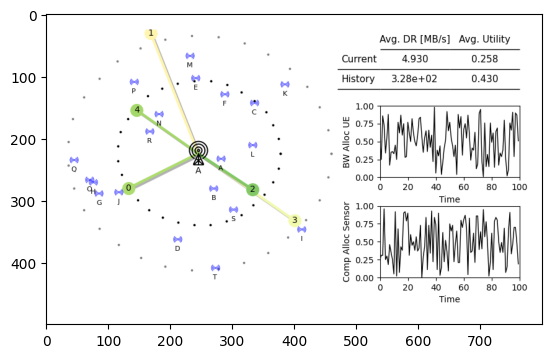

In [7]:
from IPython import display

done = False
obs, info = env.reset()

for step in range(100):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True) 
    
plt.close()

In [8]:
# load all tracked results as pandas data frames
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

# show general results
scalar_results

number UE connections  number sensor conncections  \
Time Step                                                      
0                              5                          20   
1                              5                          20   
2                              5                          20   
3                              5                          20   
4                              5                          20   
...                          ...                         ...   
95                             5                          20   
96                             5                          20   
97                             5                          20   
98                             5                          20   
99                             5                          20   

           total traffic request ue  total traffic request sensor  \
Time Step                                                           
0                              24.0                         104.0   
1                              39.0                          86.0   
2                              50.0                          97.0   
3                              63.0                         100.0   
4                              51.0                          91.0   
...                             ...                           ...   
95                             48.0                         101.0   
96                             42.0                          94.0   
97                             39.0                          87.0   
98                             55.0                          87.0   
99                             54.0                          97.0   

           delayed UE packets  delayed sensor packets  reward  \
Time Step                                                       
0                           0                       0    10.0   
1                           0                       0     0.0   
2                           0                       0    19.5   
3                           0                       0     9.5   
4                           0                       3     0.0   
...                       ...                     ...     ...   
95                          1                       3    15.0   
96                          0                       3     0.0   
97                          1                       2     4.5   
98                          1                       2    14.5   
99                          1                       3     4.5   

           cumulative reward  mean utility  mean utility sensor  \
Time Step                                                         
0                      10.00      0.135263             0.037832   
1                      10.00     -0.007437             0.127314   
2                      29.50      0.271536            -0.228251   
3                      39.00      0.253632            -0.091145   
4                      39.00      0.101690             0.100644   
...                      ...           ...                  ...   
95                    356.11      0.429572            -0.329463   
96                    356.11      0.164671             0.116426   
97                    360.61      0.403360            -0.314676   
98                    375.11      0.381357            -0.249654   
99                    379.61      0.257964             0.038429   

           mean datarate  mean datarate sensor  
Time Step                                       
0               3.843659              6.212535  
1               2.067843              9.525156  
2               7.536144              1.824332  
3               7.459146              3.430166  
4               3.883805              8.370007  
...                  ...                   ...  
95             12.080674              1.144668  
96              3.424735              9.035481  
97             10.110932              1.225332  
98              8.89651

In [9]:
kpi_results

bw allocation UE  bw allocation sensor  comp. allocation UE  \
Time Step                                                                
0                      0.51                  0.49                 0.25   
1                      0.25                  0.75                 0.31   
2                      0.86                  0.14                 0.31   
3                      0.73                  0.27                 0.96   
4                      0.34                  0.66                 0.25   
...                     ...                   ...                  ...   
95                     0.91                  0.09                 0.46   
96                     0.29                  0.71                 0.70   
97                     0.90                  0.10                 0.70   
98                     0.87                  0.13                 0.48   
99                     0.51                  0.49                 0.19   

           comp. allocation sensor  reward  reward cumulative  total aori  \
Time Step                                                                   
0                             0.75    10.0              10.00         0.0   
1                             0.69     0.0              10.00         0.0   
2                             0.69    19.5              29.50         1.0   
3                             0.04     9.5              39.00         0.0   
4                             0.75     0.0              39.00         0.0   
...                            ...     ...                ...         ...   
95                            0.54    15.0             356.11        73.0   
96                            0.30     0.0             356.11         0.0   
97                            0.30     4.5             360.61        74.0   
98                            0.52    14.5             375.11        74.0   
99                            0.81     4.5             379.61        31.0   

           total aosi  total delayed packets  total throughput ue  \
Time Step                                                           
0                 0.0                      0             8.946280   
1                 0.0                      0             9.182859   
2                 1.0                      0            21.162783   
3                 1.0                      0            17.241596   
4                 0.0                      0             4.096102   
...               ...                    ...                  ...   
95               73.0                      1            27.310104   
96                0.0                      0             8.985080   
97               74.0                      1            27.548650   
98               74.0                      1            37.535561   
99               31.0                      1            24.649304   

           total throughput sensor  
Time Step                           
0                        33.789690  
1                        38.552504  
2                        16.483970  
3                        24.712284  
4                        44.665208  
...                            ...  
95                        9.578116  
96                       50.865785  
97                       12.041670  
98                       14.499891  
99                       37.748544  

[100 rows x 11 columns]

In [10]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            99.946785              6.0   
          1       0.0   0.0            43.472946              7.0   
          2       NaN   NaN           101.735100              0.0   
          3       NaN   NaN            75.488173              0.0   
          4       NaN   NaN            92.039596             11.0   
...               ...   ...                  ...              ...   
99        0       NaN   NaN            56.554186             12.0   
          1      30.0  30.0           104.867118             15.0   
          2       NaN   NaN            47.216607             15.0   
          3       NaN   NaN            86.227001              5.0   
          4       1.0   1.0            54.824342              7.0   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           0.812115              1.0         0.812115     -0.045191  
          1          14.315190              0.0         7.000000      0.577899  
          2           0.787405              0.0         0.000000     -0.051901  
          3           2.169419              0.0         0.000000      0.168172  
          4           1.134165              1.0         1.134165      0.027338  
...                        ...              ...              ...           ...  
99        0           5.592186             50.0         5.592186      0.373791  
          1           0.729695             24.0         0.729695     -0.068429  
          2          10.535344              1.0        10.535344      0.511324  
          3           1.377518             13.0         1.377518      0.069549  
          4           6.414561              1.0         6.414561      0.403583  

[500 rows x 8 columns]

In [11]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423        88.548845   
          1                        30.083218        11.630825   
          2                        57.280014         1.321560   
          3                        70.611614         0.651918   
          4                        61.032778         1.066625   
...                                      ...              ...   
99        15                       74.027022         0.557326   
          16                       89.140339         0.297595   
          17                       39.357337         4.706367   
          18                       51.478151         1.900714   
          19                       92.779308         0.259980   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        0.0           4.000000        0.973591   
          1                        0.0           7.000000        0.532805   
          2                        1.0           1.321560        0.060543   
          3                        1.0           0.651918       -0.092904   
          4                        1.0           1.066625        0.014006   
...                                ...                ...             ...   
99        15                      87.0           0.557326       -0.126946   
          16                      96.0           0.297595       -0.263188   
          17                       7.0           4.706367        0.336343   
          18                      60.0           1.900714        0.139458   
          19                      96.0           0.259980       -0.292530   

Metric               traffic request  
Time Step Sensor ID                   
0         0                      4.0  
          1                      7.0  
          2                      2.0  
          3                      7.0  
          4                      4.0  
...                              ...  
99        15                     5.0  
          16                     5.0  
          17                     5.0  
          18                     3.0  
          19                     3.0  

[2000 rows x 6 columns]

In [12]:
bs_results

Metric           queue size accomplished UE jobs  \
Time Step BS ID                                    
0         0                                    1   
1         0                                    1   
2         0                                    3   
3         0                                    4   
4         0                                    4   
...                                          ...   
95        0                                  256   
96        0                                  256   
97        0                                  258   
98        0                                  261   
99        0                                  263   

Metric           queue size accomplished sensor jobs  \
Time Step BS ID                                        
0         0                                        4   
1         0                                       12   
2         0                                       13   
3         0                                       13   
4         0                                       29   
...                                              ...   
95        0                                      651   
96        0                                      657   
97        0                                      660   
98        0                                      664   
99        0                                      670   

Metric           queue size transferred UE jobs  \
Time Step BS ID                                   
0         0                                   0   
1         0                                   0   
2         0                                   0   
3         0                                   0   
4         0                                   0   
...                                         ...   
95        0                                   0   
96        0                                   0   
97        0                                   0   
98        0                                   0   
99        0                                   0   

Metric           queue size transferred sensor jobs  
Time Step BS ID                                      
0         0                                       0  
1         0                                       0  
2         0                                       0  
3         0                                       5  
4         0                                       1  
...                                             ...  
95        0                                       0  
96        0                                       2  
97        0                                       0  
98        0                                       0  
99        0                                       0  

[100 rows x 4 columns]

In [13]:
data = kpi_results.agg(['mean', 'min', 'max'])
data

bw allocation UE  bw allocation sensor  comp. allocation UE  \
mean            0.5074                0.4926               0.4899   
min             0.0100                0.0200               0.0000   
max             0.9800                0.9900               0.9600   

      comp. allocation sensor  reward  reward cumulative  total aori  \
mean                   0.5101   3.796           127.4975       23.28   
min                    0.0400 -40.000           -94.0500        0.00   
max                    1.0000  53.000           379.6100       88.00   

      total aosi  total delayed packets  total throughput ue  \
mean       25.39                   1.39            26.830229   
min         0.00                   0.00             1.464330   
max       194.00                   8.00            97.462427   

      total throughput sensor  
mean                33.842607  
min                  4.747787  
max                 62.378357

In [14]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                  AoSI            distance UE-station  \
             mean  min   max       mean  min   max                mean   
UE ID                                                                    
0       53.368421  6.0  73.0  51.000000  6.0  73.0           81.330213   
1        2.977778  0.0  30.0   4.933333  0.0  35.0           47.964568   
2       11.488889  0.0  54.0  12.622222  0.0  51.0           43.210365   
3        3.804348  0.0  15.0   5.195652  0.0  35.0           51.769772   
4        9.568627  0.0  45.0  10.607843  0.0  73.0           46.767755   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       56.554186   99.946785           10.50  ...      9.852815   
1       13.257969  106.225573           10.25  ...   1670.126492   
2        5.406402  101.735100           10.03  ...  44619.948044   
3       31.935622   86.227001            9.60  ...     72.911575   
4       26.218494   92.039596           10.53  ...    151.132389   

Metric user queue size            user throughput                       \
                  mean  min   max            mean       min        max   
UE ID                                                                    
0                29.54  1.0  51.0        2.084552  0.066122   9.852815   
1                 4.16  0.0  24.0        4.910331  0.000000  19.000000   
2                 4.03  0.0  13.0        6.445353  0.000000  43.229174   
3                 2.43  0.0  13.0        5.657658  0.000000  20.618454   
4                 4.11  0.0  13.0        7.732334  0.000000  37.863635   

Metric user utility                      
               mean       min       max  
UE ID                                    
0          0.071342 -0.589828  0.496780  
1          0.525690 -0.671478  1.000000  
2          0.583620 -0.214888  1.000000  
3          0.438329 -0.493014  0.931398  
4          0.531845 -0.139251  1.000000  

[5 rows x 24 columns]

In [15]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate  \
                             mean        min        max            mean   
Sensor ID                                                                 
0                       16.492423  16.492423  16.492423       88.945628   
1                       30.083218  30.083218  30.083218       11.682942   
2                       57.280014  57.280014  57.280014        1.327482   
3                       70.611614  70.611614  70.611614        0.654839   
4                       61.032778  61.032778  61.032778        1.071405   
5                       51.623638  51.623638  51.623638        1.885920   
6                       77.878110  77.878110  77.878110        0.470405   
7                       78.447435  78.447435  78.447435        0.458975   
8                       95.900991  95.900991  95.900991        0.232889   
9                       64.884513  64.884513  64.884513        0.871355   
10                      83.546394  83.546394  83.546394        0.371045   
11                      39.623226  39.623226  39.623226        4.608465   
12                      79.227520  79.227520  79.227520        0.443891   
13                      42.520583  42.520583  42.520583        3.631182   
14                      80.777472  80.777472  80.777472        0.415776   
15                      74.027022  74.027022  74.027022        0.558283   
16                      89.140339  89.140339  89.140339        0.298106   
17                      39.357337  39.357337  39.357337        4.714456   
18                      51.478151  51.478151  51.478151        1.903981   
19                      92.779308  92.779308  92.779308        0.260427   

Metric                          sensor queue size             \
                min         max              mean  min   max   
Sensor ID                                                      
0          4.334916  178.575211              0.00  0.0   0.0   
1          0.569388   23.455720              0.20  0.0   2.0   
2          0.064697    2.665172             37.44  1.0  73.0   
3          0.031915    1.314714             44.57  1.0  88.0   
4          0.052217    2.151048             38.99  1.0  76.0   
5          0.091914    3.786342             32.74  1.0  63.0   
6          0.022926    0.944428             45.44  1.0  89.0   
7          0.022369    0.921479             46.71  1.0  93.0   
8          0.011350    0.467569             48.71  1.0  96.0   
9          0.042467    1.749411             41.81  1.0  84.0   
10         0.018084    0.744943             47.24  1.0  93.0   
11         0.224601    9.252368             10.50  0.0  17.0   
12         0.021634    0.891195             46.37  1.0  91.0   
13         0.176972    7.290287             13.63  0.0  29.0   
14         0.020264    0.834750             47.47  1.0  93.0   
15         0.027209    1.120860             44.25  1.0  87.0   
16         0.014529    0.598504             48.97  1.0  96.0   
17         0.229767    9.465164              4.11  0.0   9.0   
18         0.092794    3.822602             30.64  1.0  60.0   
19         0.012692    0.522857             48.96  1.0  96.0   

Metric    sensor throughput                      sensor utility            \
                       mean       min        max           mean       min   
Sensor ID                                                                   
0                  4.930000  1.000000  10.000000       0.905305  0.318490   
1                  4.900000  0.569388  18.148481       0.490735 -0.122296   
2                  1.327482  0.064697   2.665172       0.018473 -0.594558   
3                  0.654839  0.031915   1.314714      -0.134974 -0.748005   
4                  1.071405  0.052217   2.151048      -0.028064 -0.641095   
5                  1.885920  0.091914   3.786342       0.094721 -0.518310   
6                  0.470405  0.022926   0.944428      -0.206805 -0.819836   
7                  0.458975  0.

In [16]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                               130.46   1  263   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                   327.74   4  670   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                2.96   0  24   

Metric queue size transferred sensor jobs          
                                     mean min max  
BS ID                                              
0                                    3.51   0  20

In [17]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

number UE connections  number sensor conncections  \
min                     5.0                        20.0   
max                     5.0                        20.0   
mean                    5.0                        20.0   

      total traffic request ue  total traffic request sensor  \
min                      24.00                          80.0   
max                      78.00                         123.0   
mean                     50.91                          98.4   

      delayed UE packets  delayed sensor packets  reward  cumulative reward  \
min                 0.00                    0.00 -40.000           -94.0500   
max                 8.00                   15.00  53.000           379.6100   
mean                1.39                    4.12   3.796           127.4975   

      mean utility  mean utility sensor  mean datarate  mean datarate sensor  
min      -0.306950            -0.617270       0.455208              0.304135  
max       0.780314             0.183855    8943.226996             12.528731  
mean      0.430165            -0.005549     327.866101              6.240373

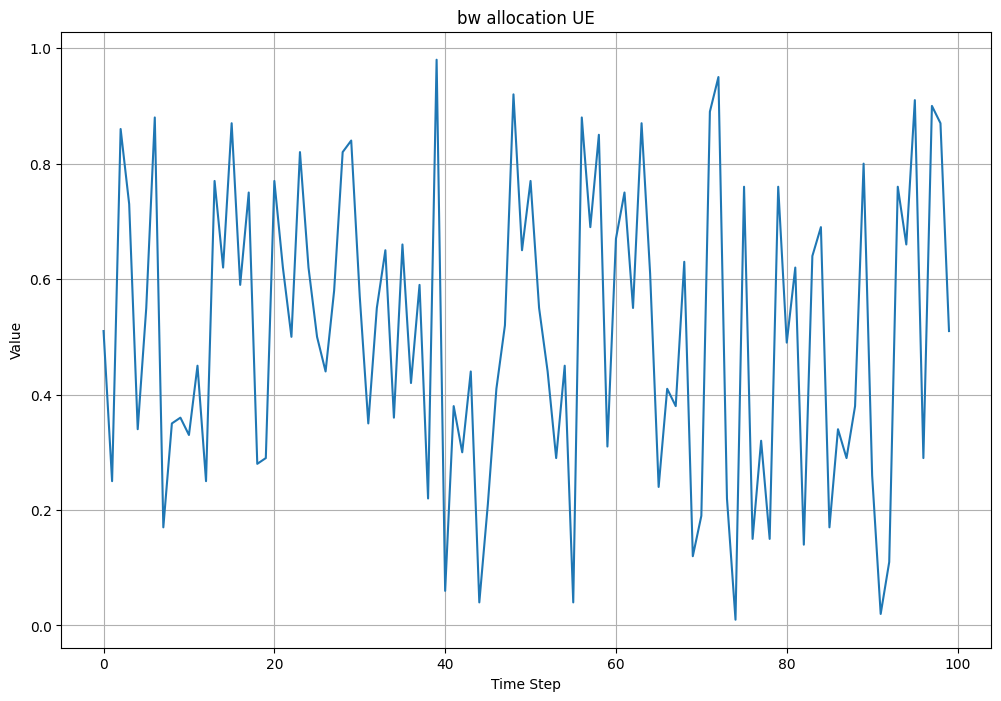

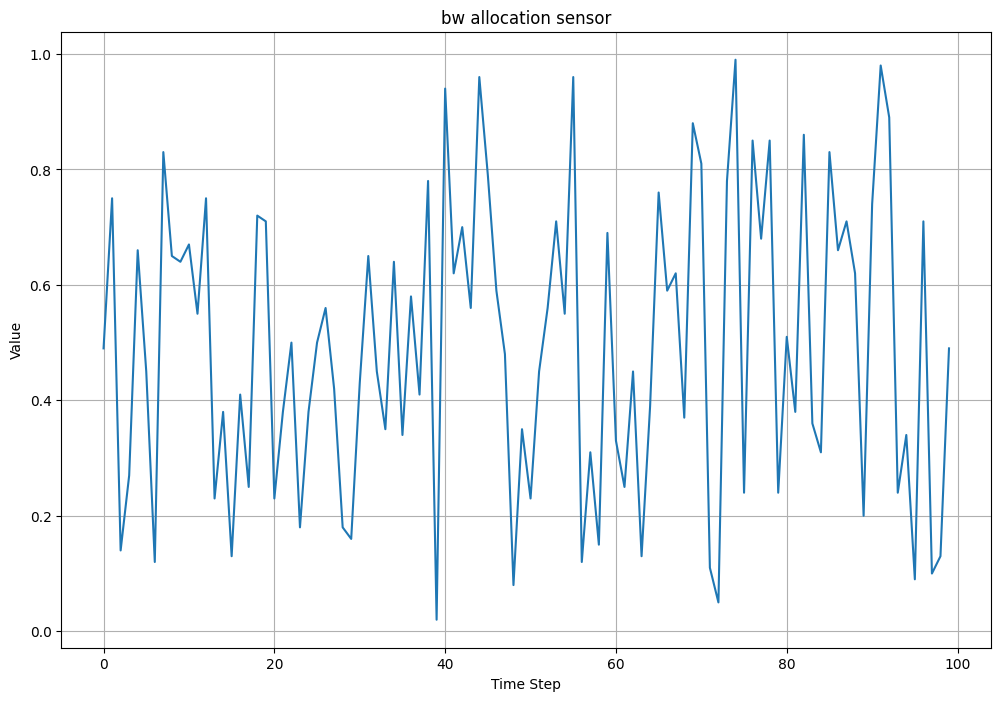

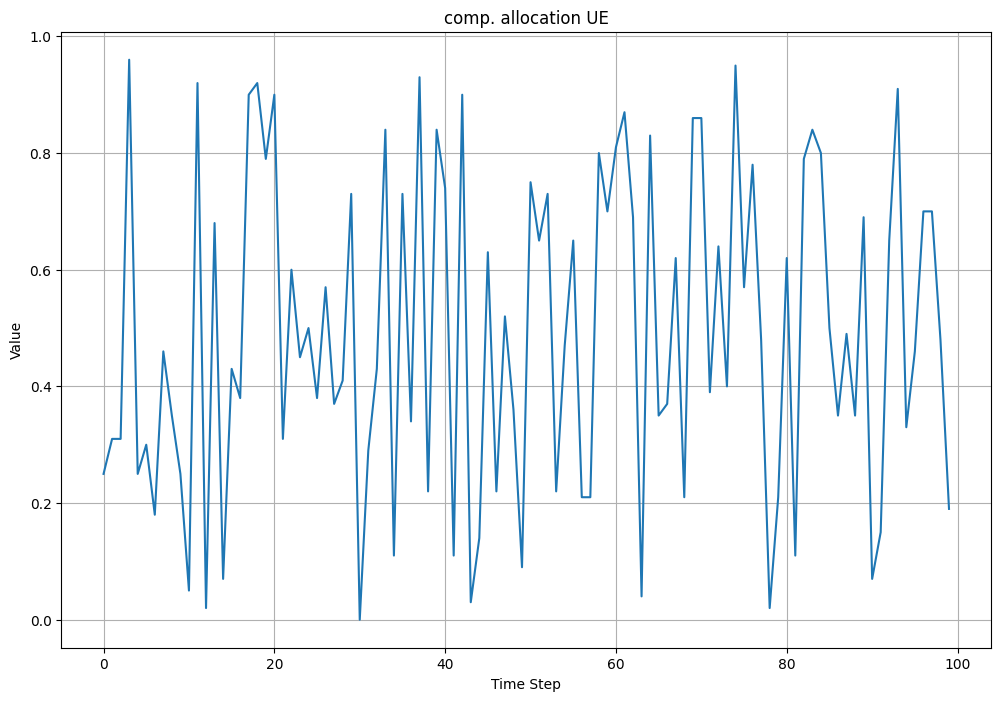

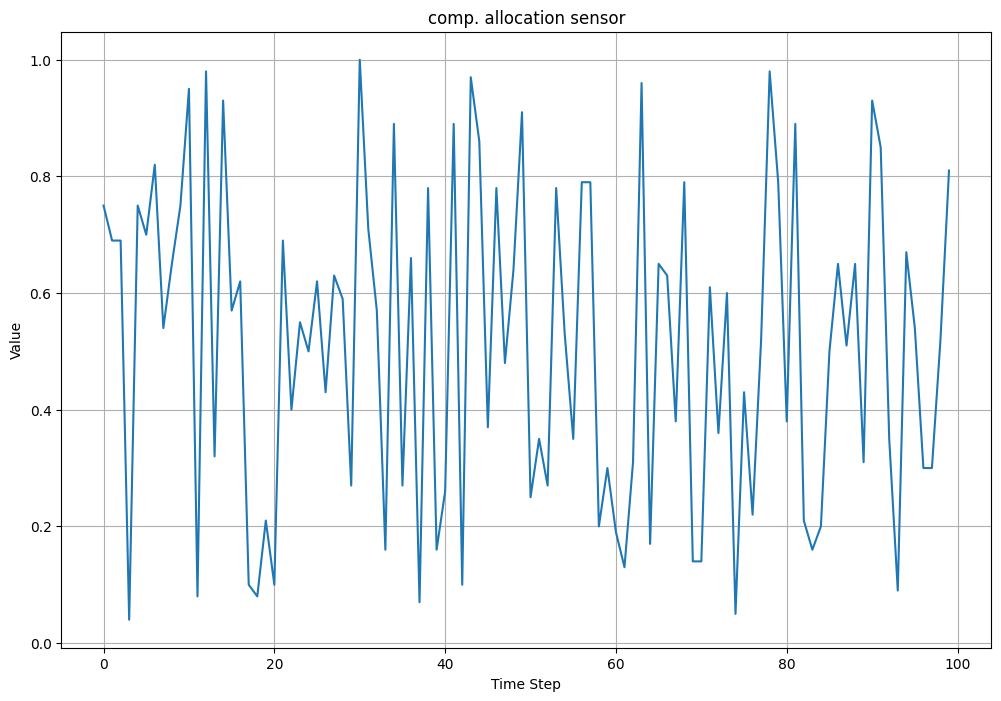

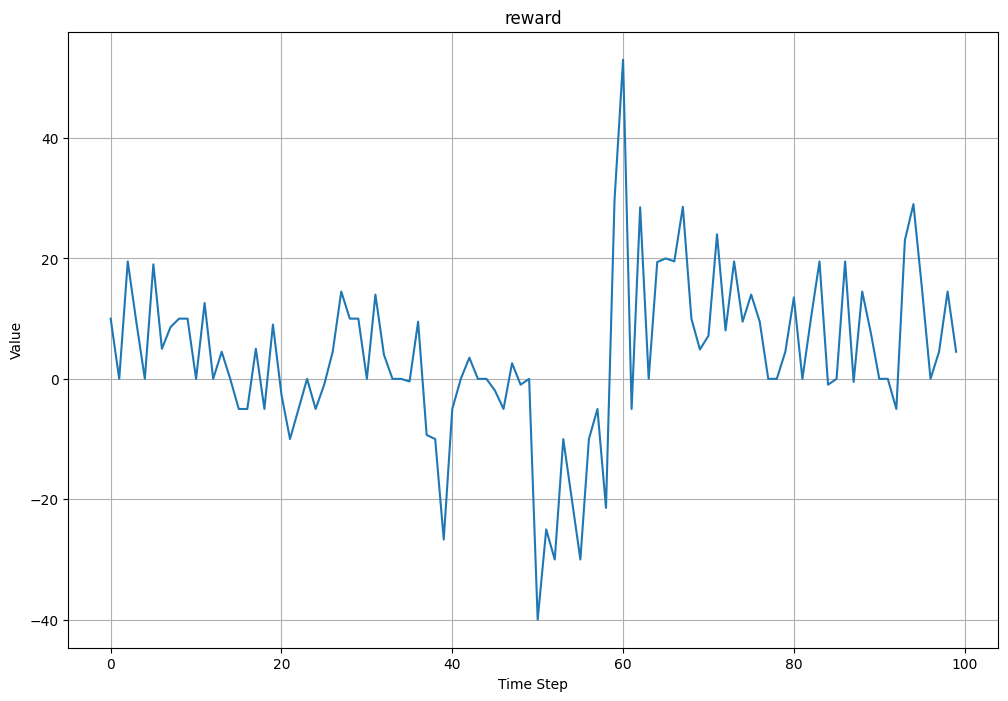

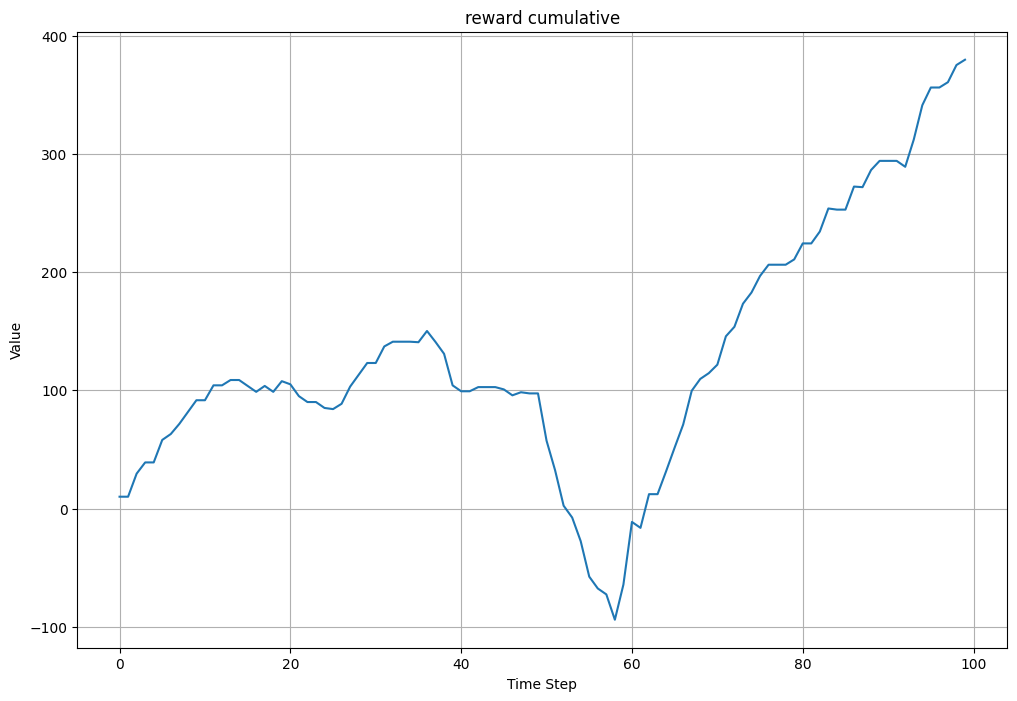

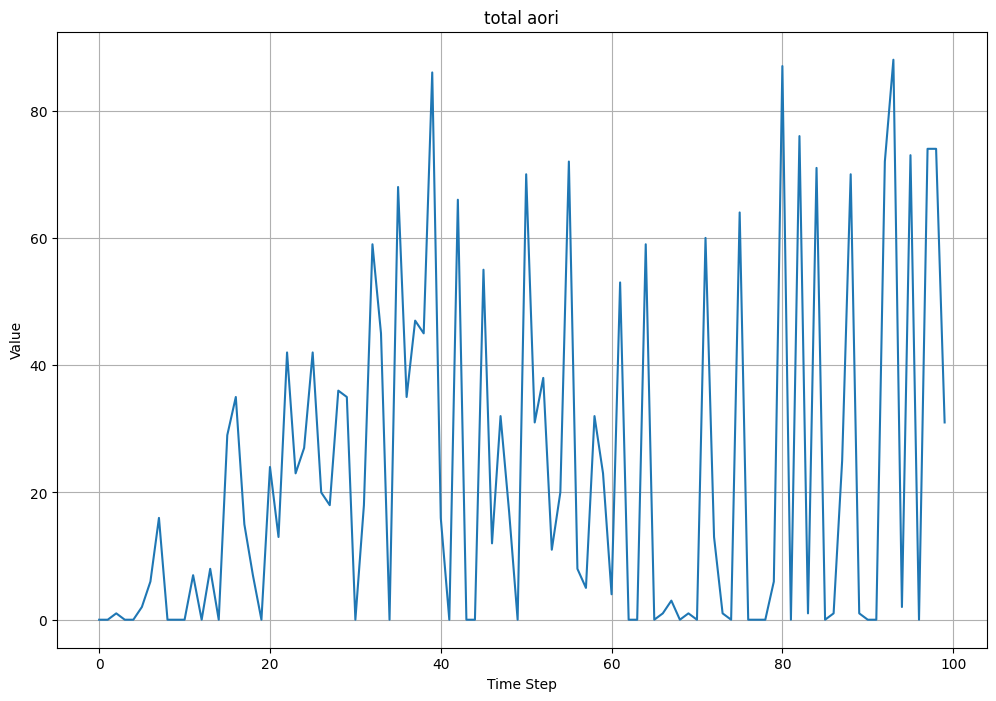

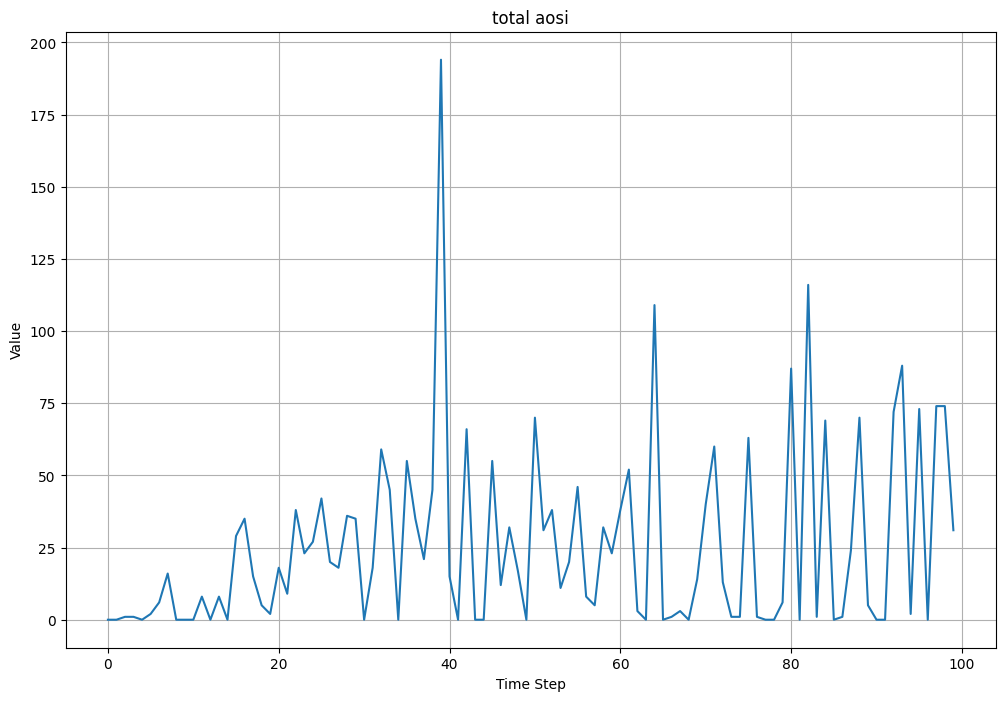

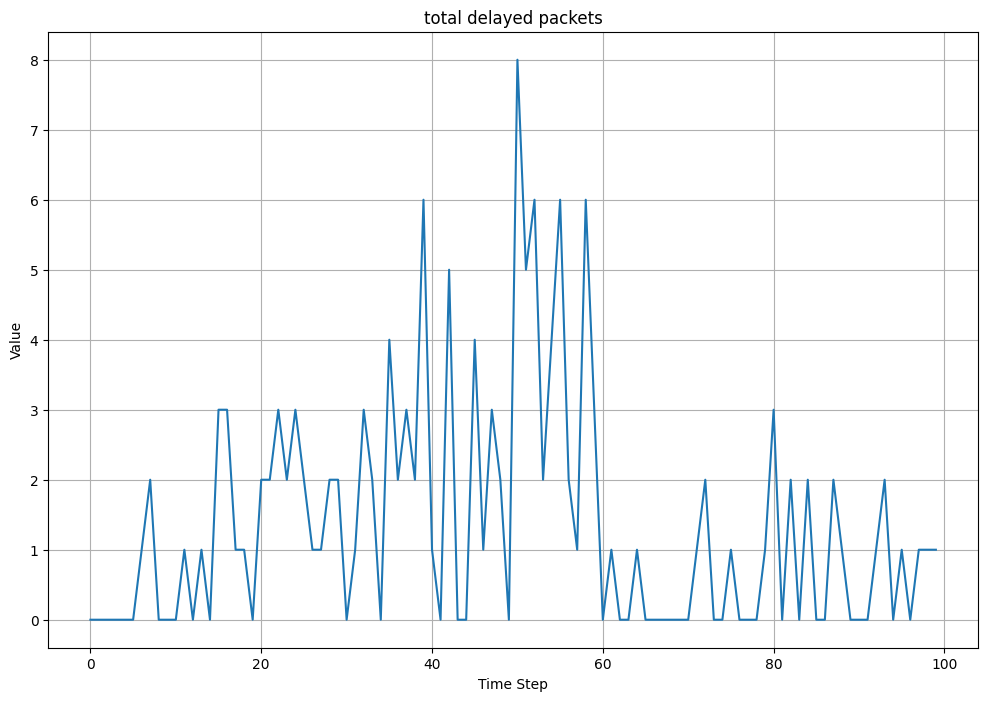

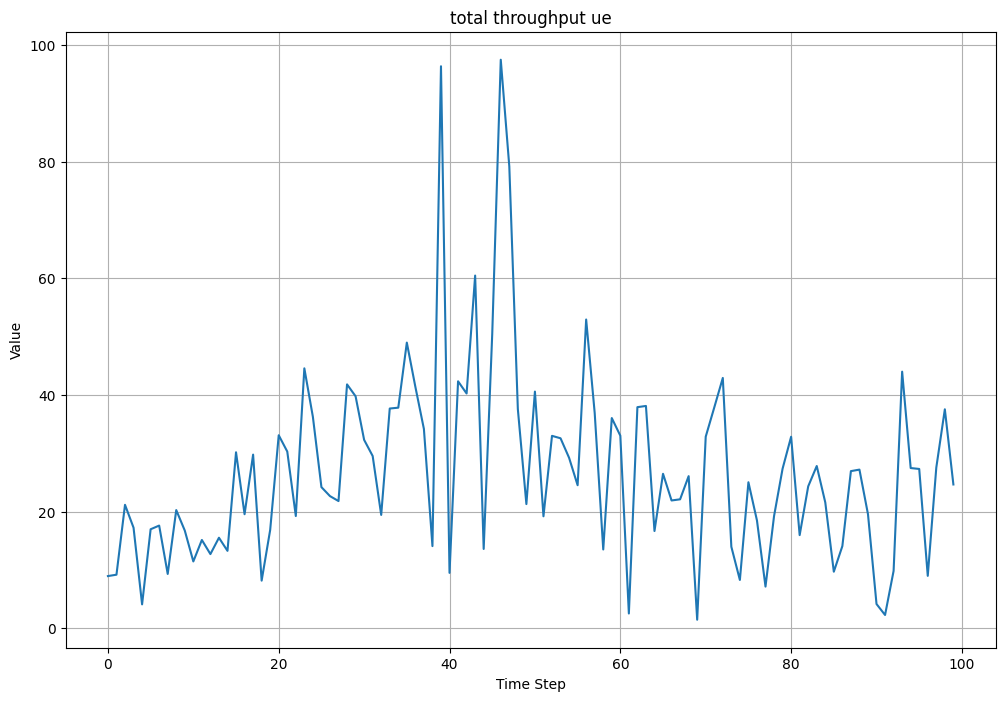

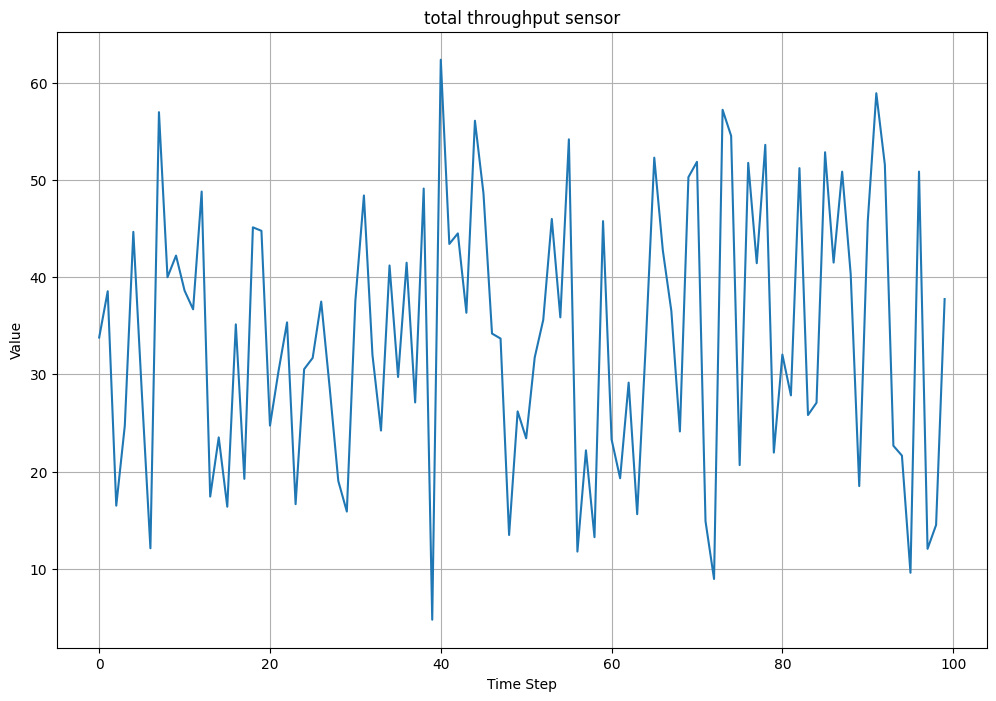

In [19]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()

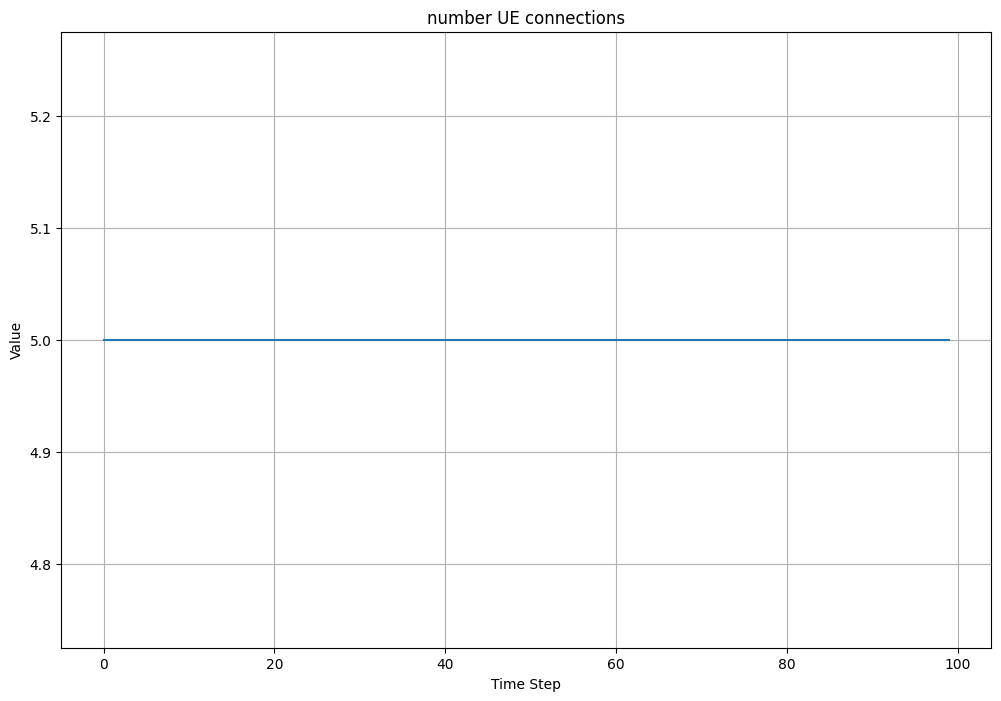

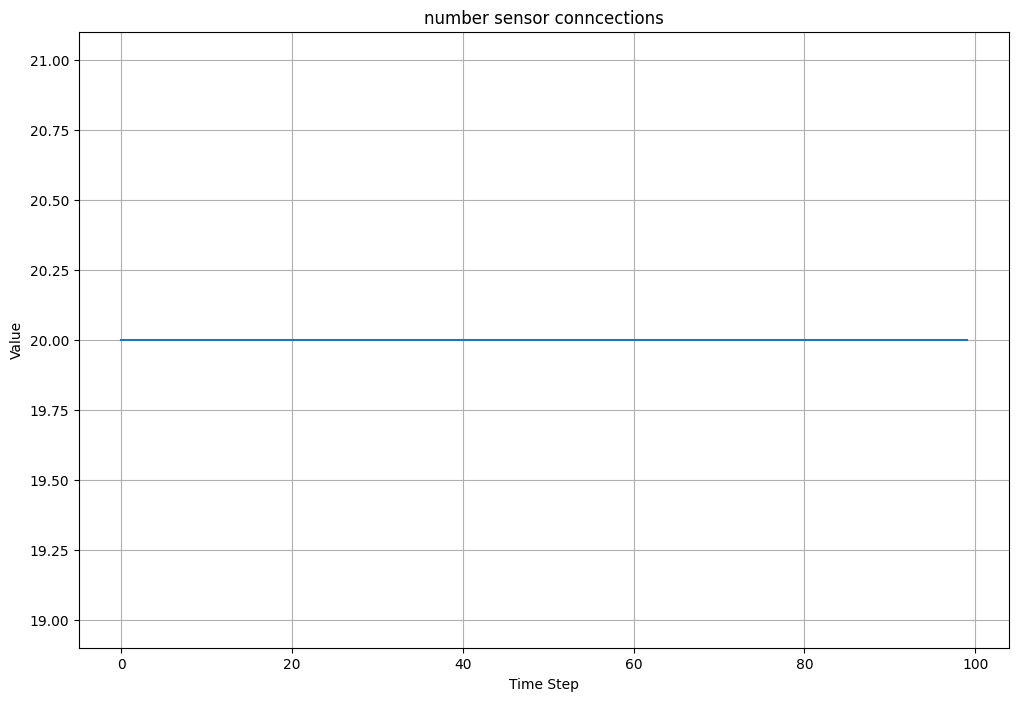

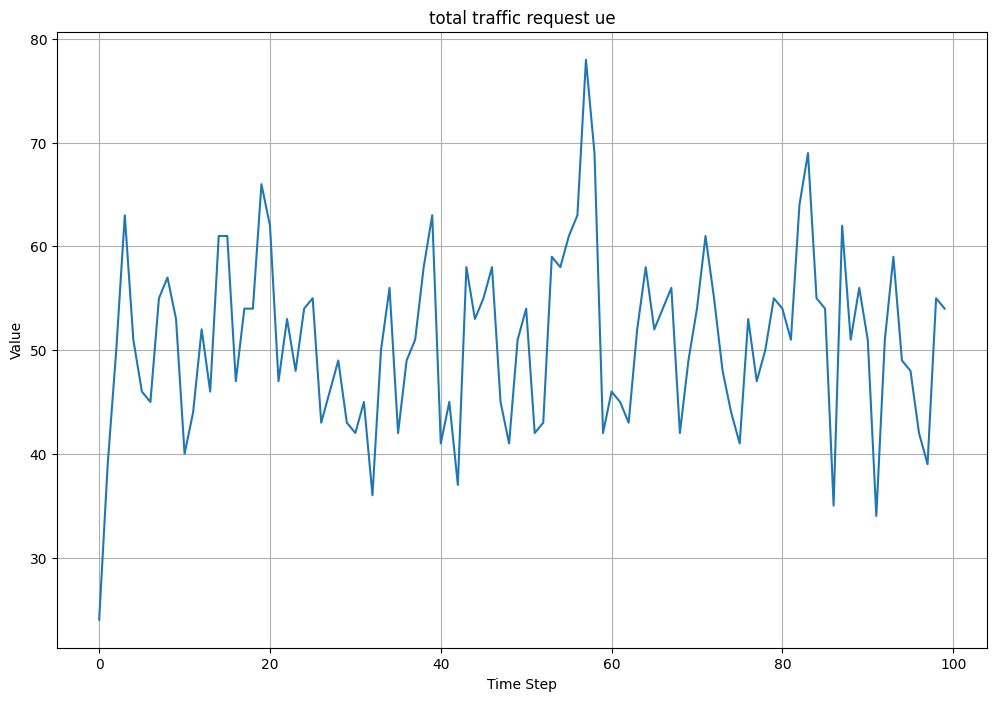

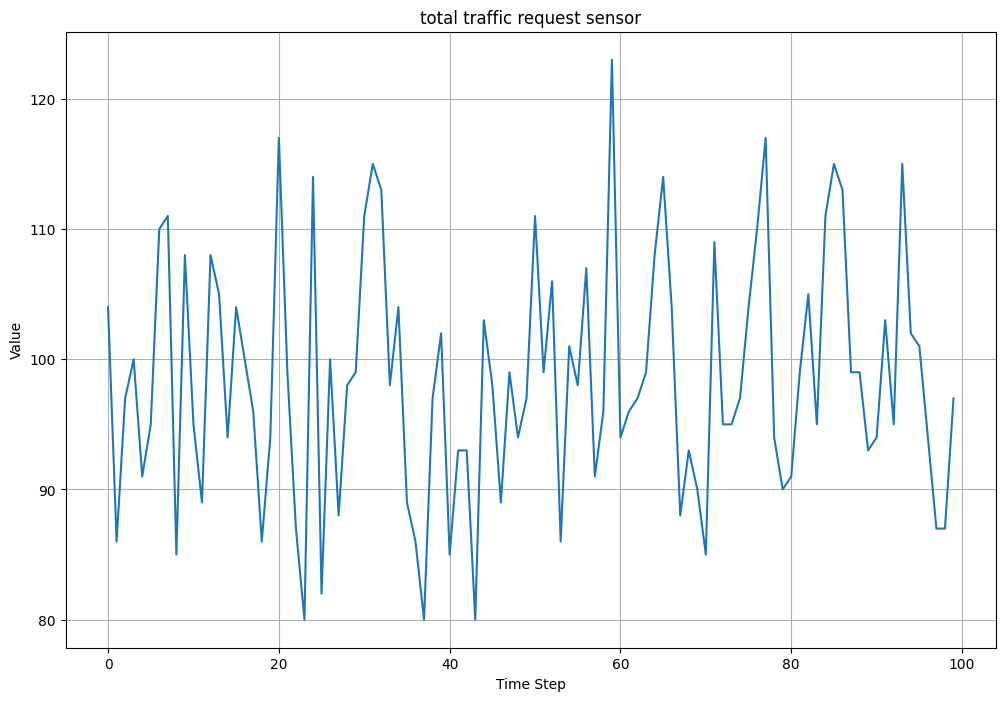

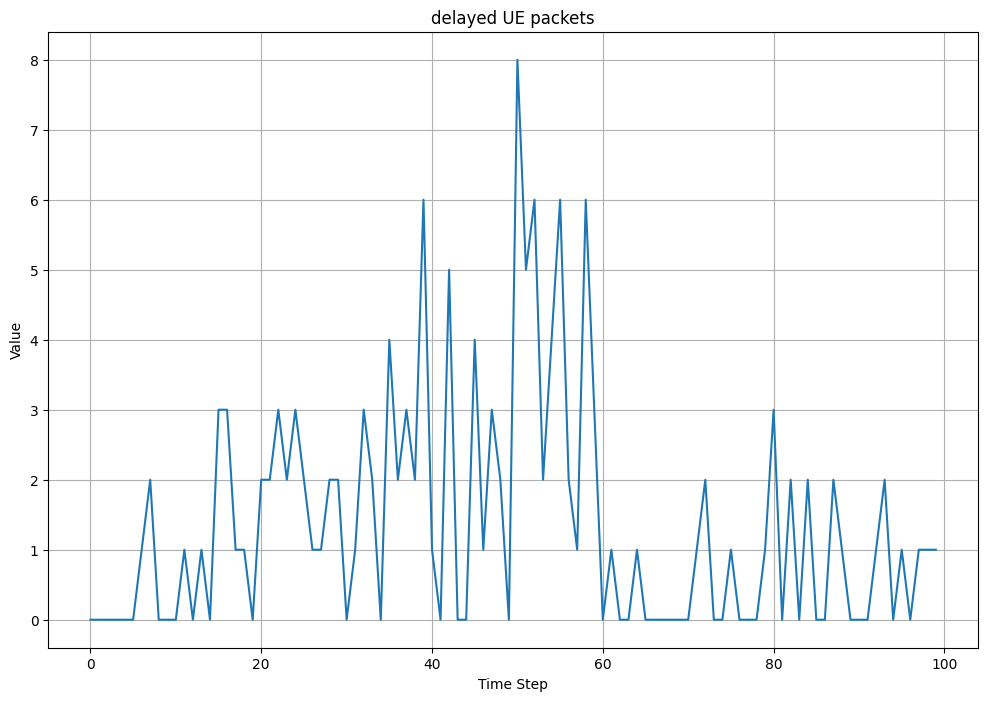

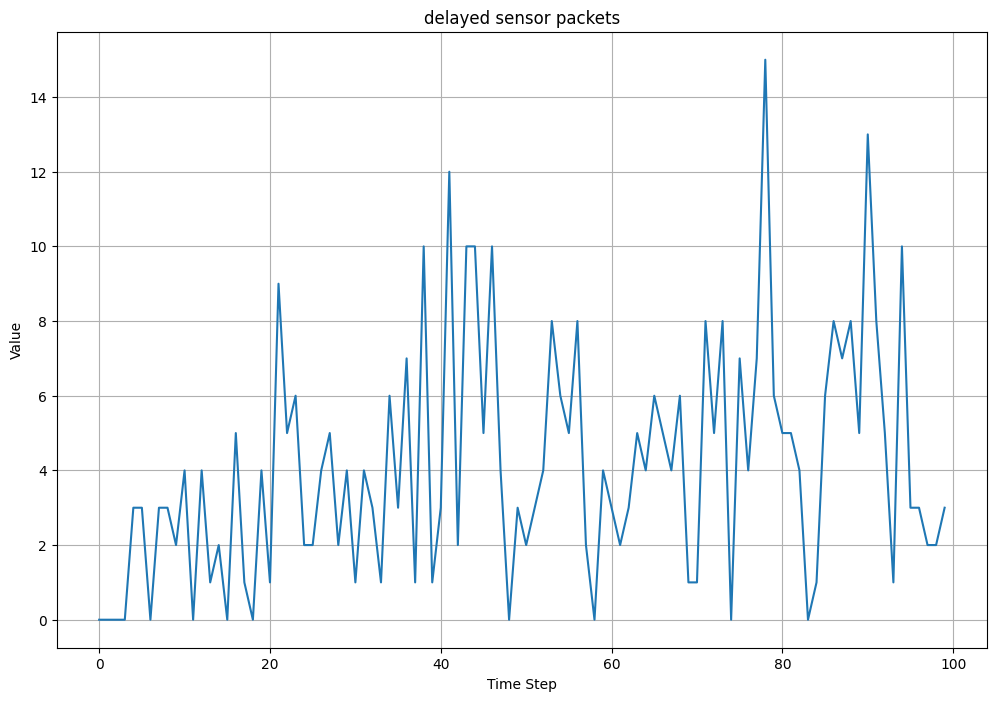

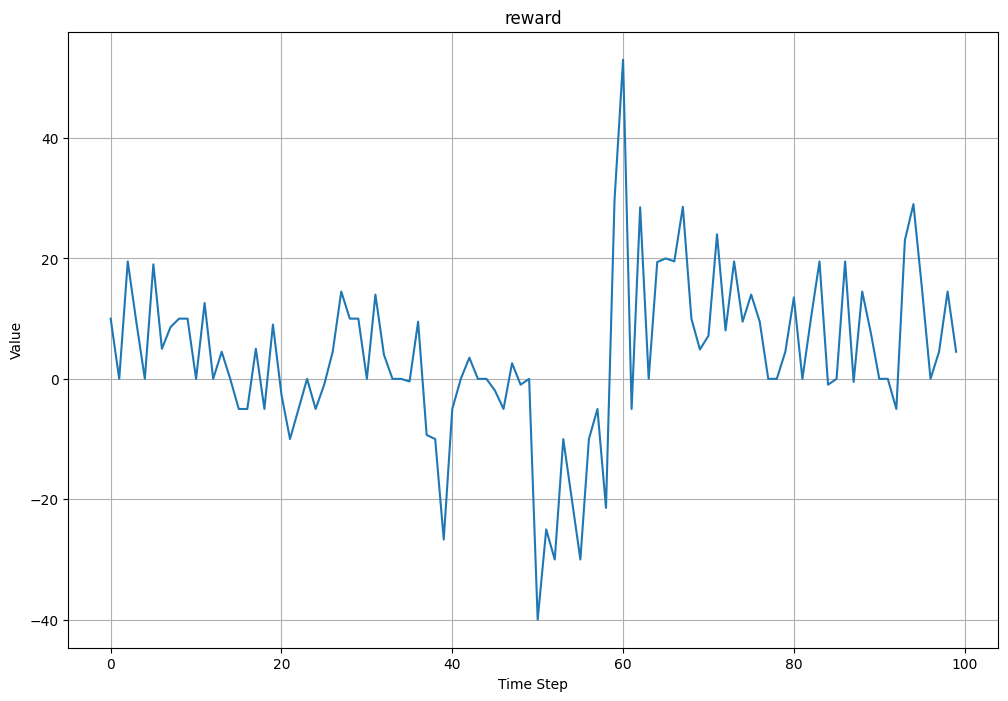

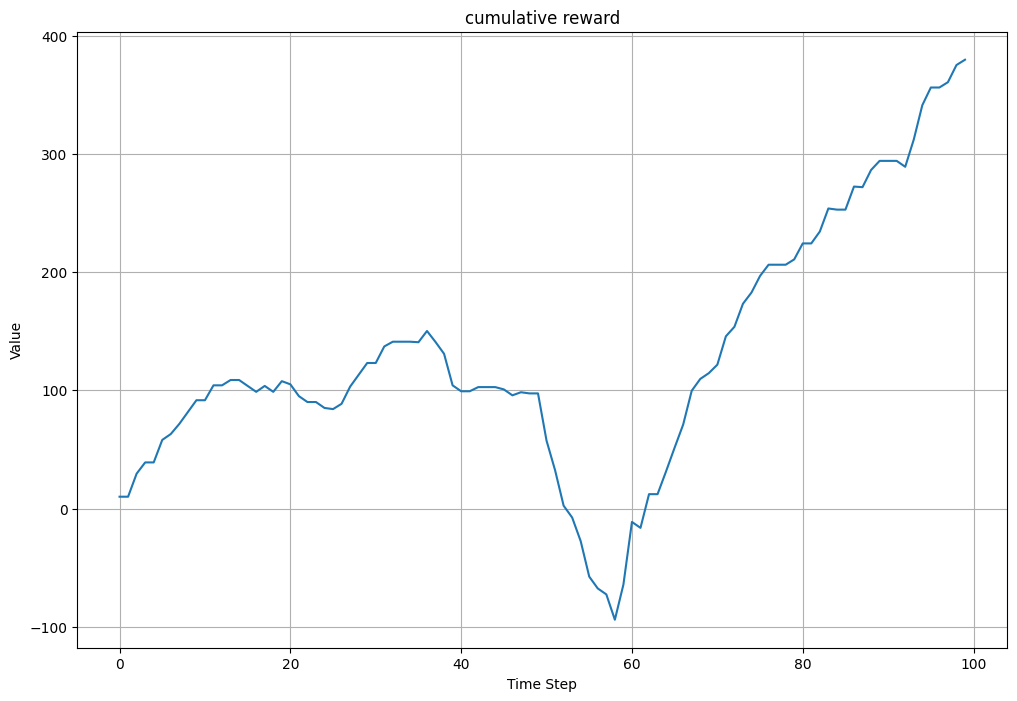

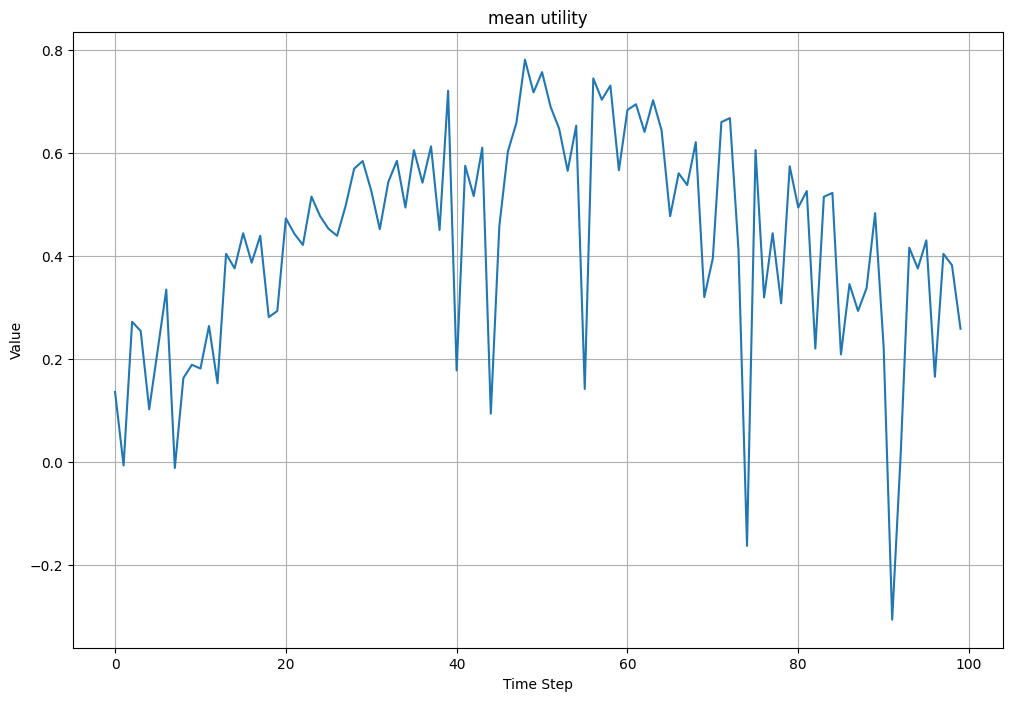

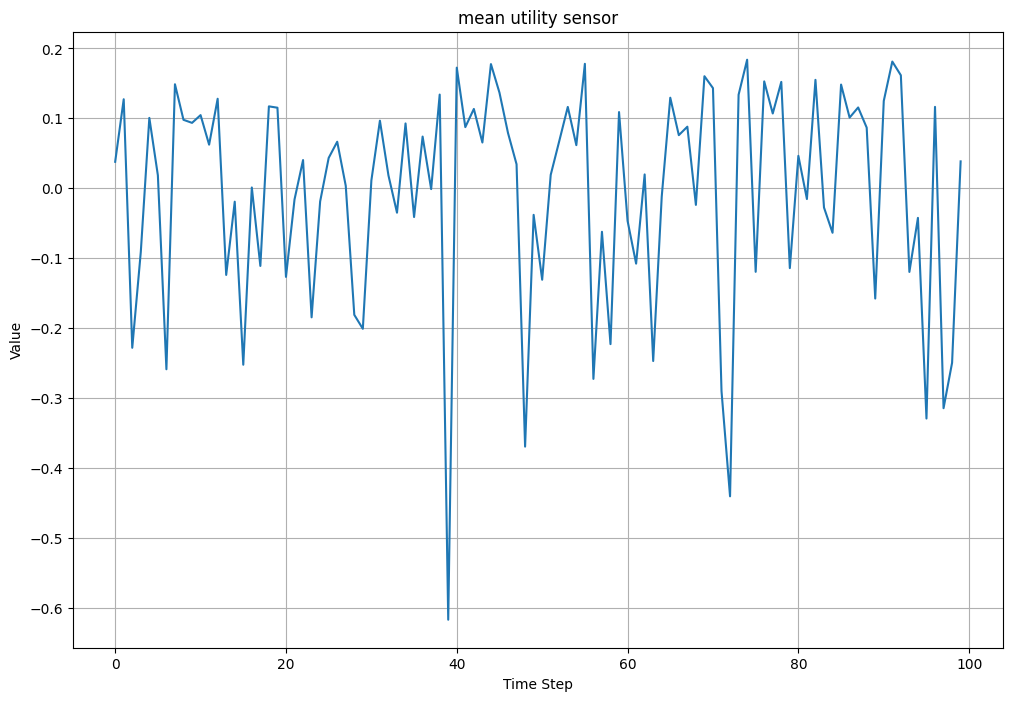

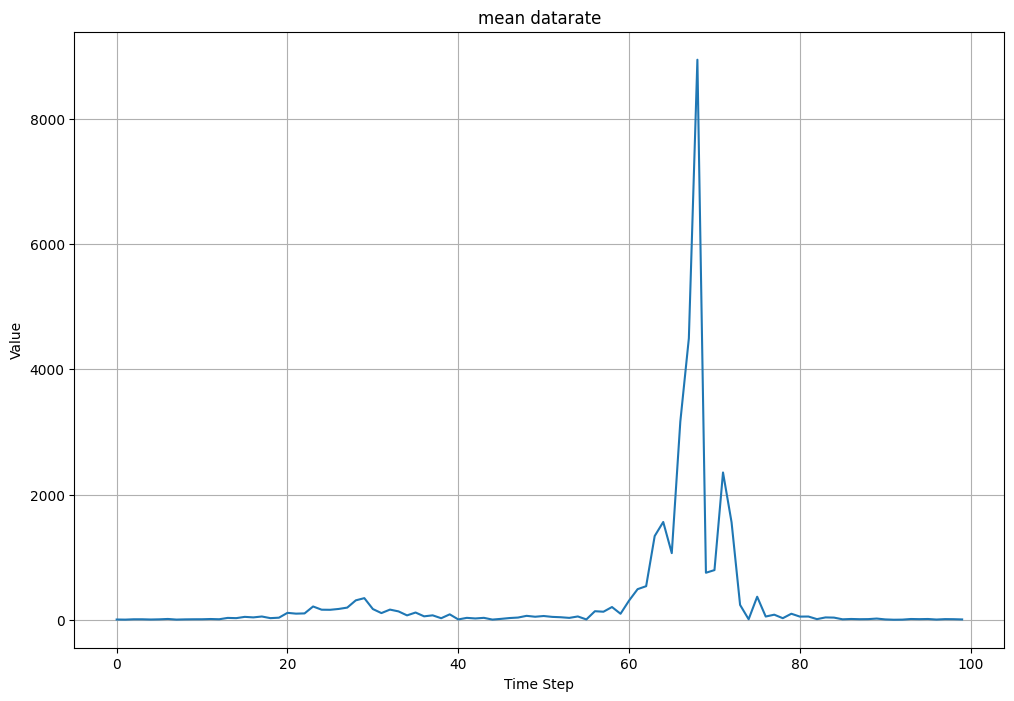

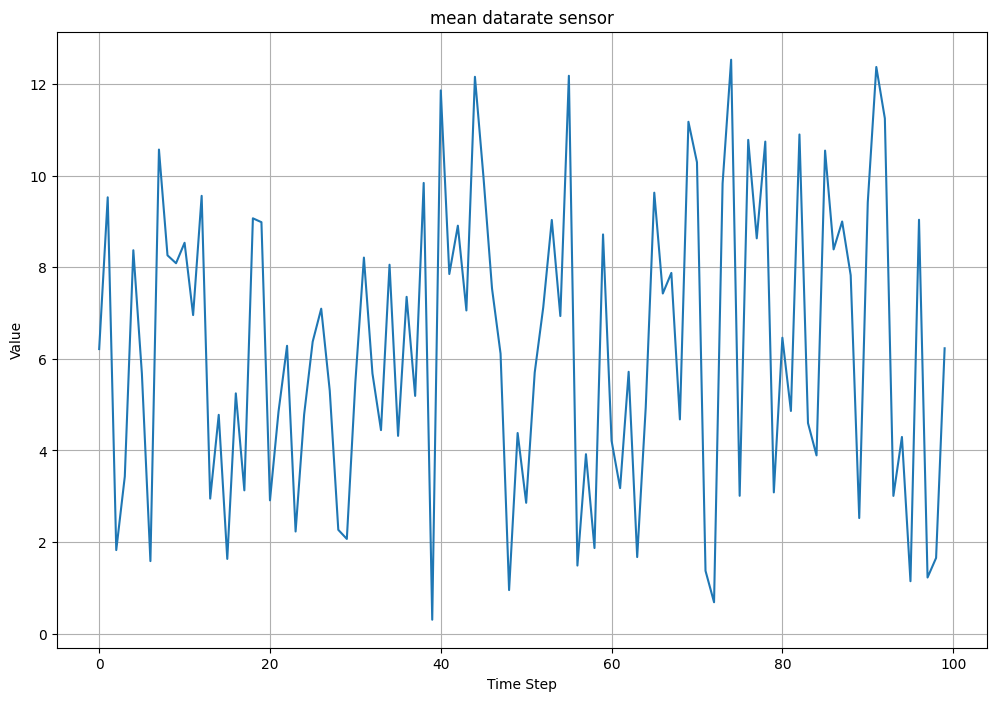

In [20]:
import matplotlib.pyplot as plt

def plot_scalar_metrics():
    # Plot scalar metrics
    for metric in scalar_results.columns:
        plt.figure(figsize=(12, 8))
        scalar_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_scalar_metrics()

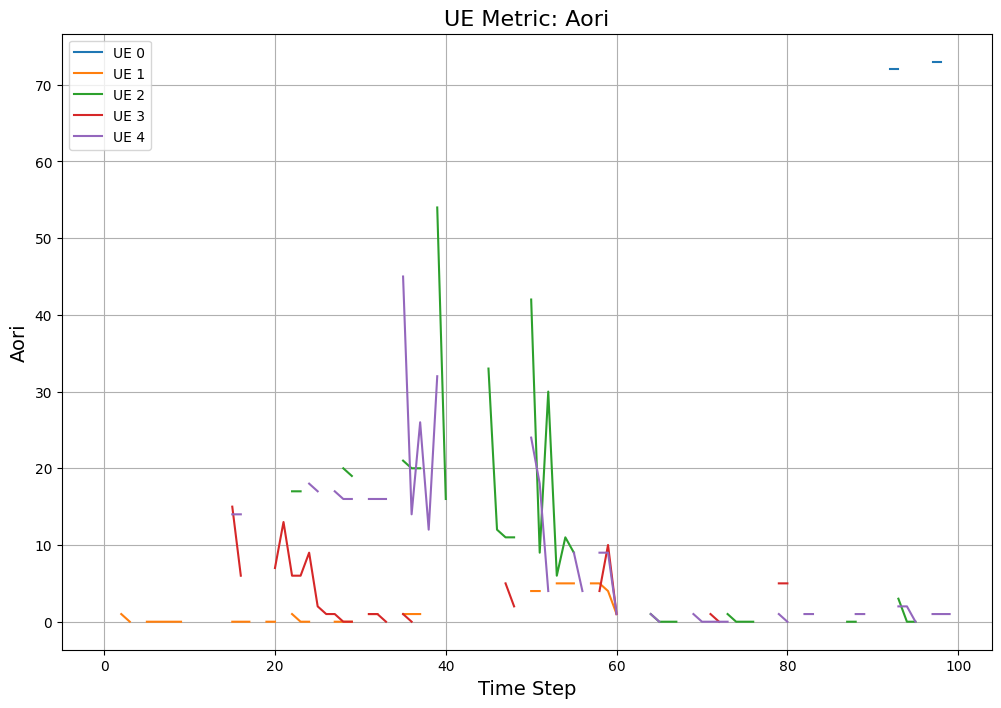

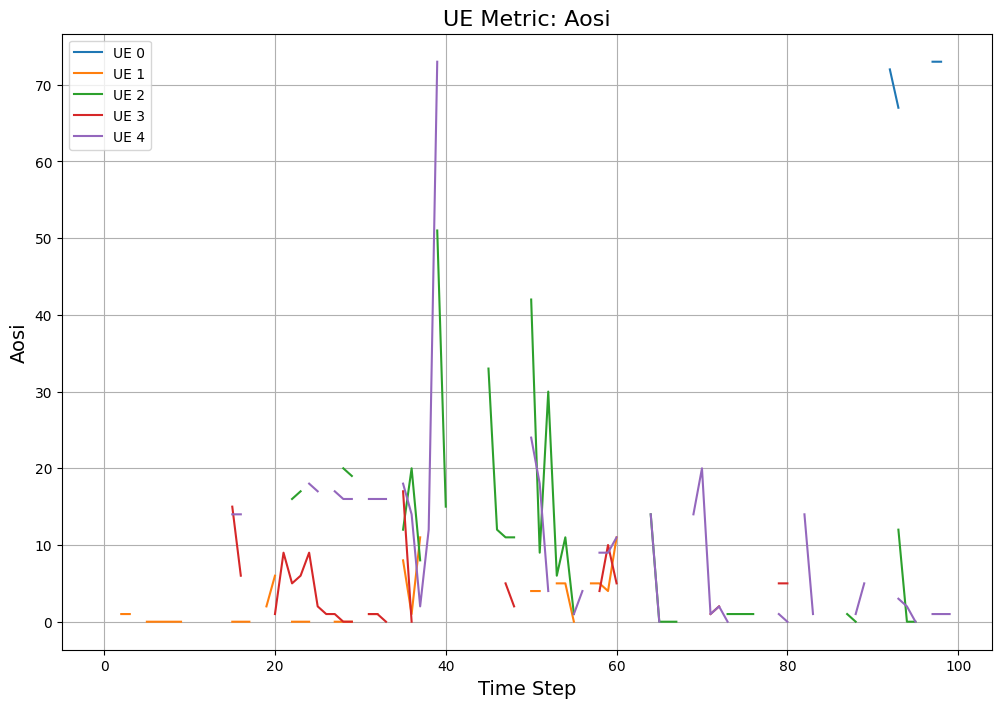

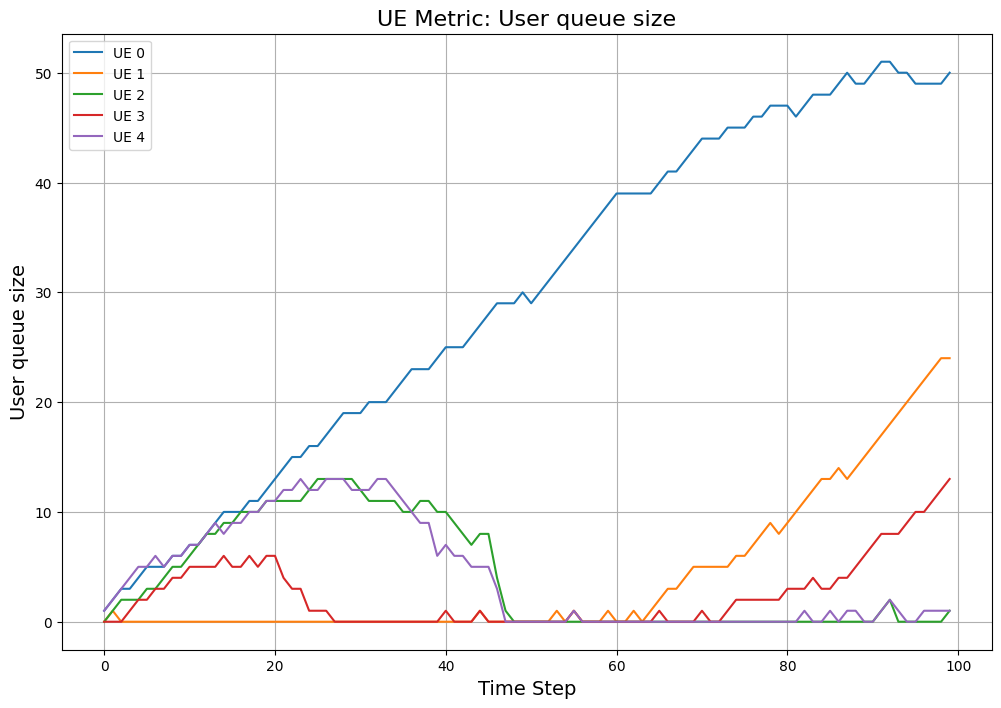

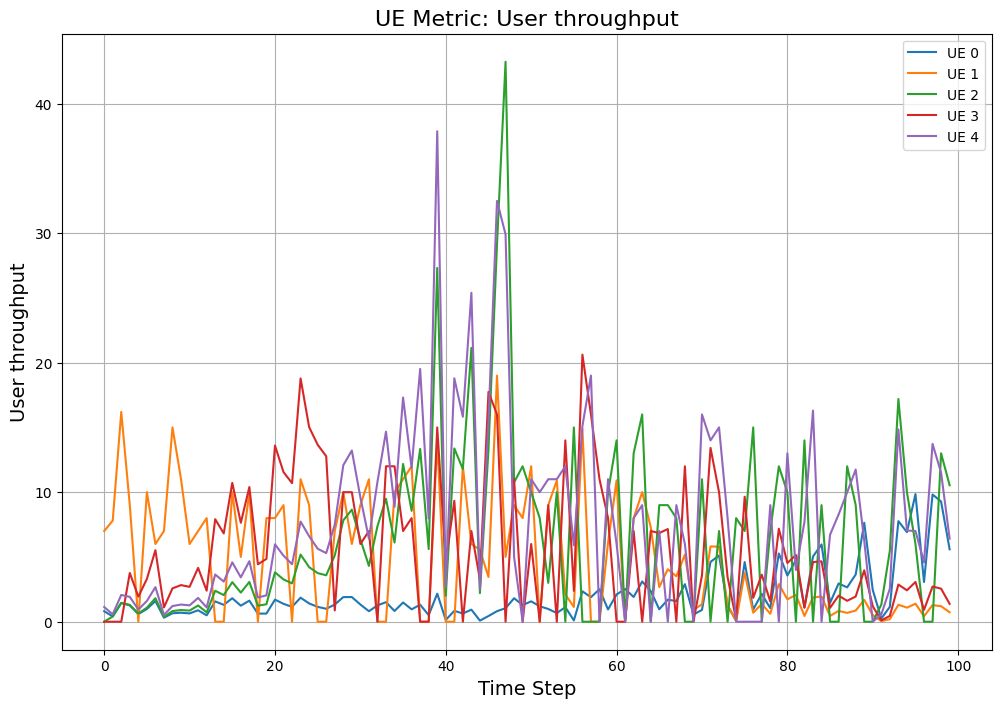

In [21]:
import matplotlib.pyplot as plt

def plot_ue_metrics(ue_results):
    required_metrics = ["user throughput", "user queue size", "AoRI", "AoSI"]
    available_metrics = [metric for metric in ue_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
            
        plt.title(f"UE Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_ue_metrics(ue_results)

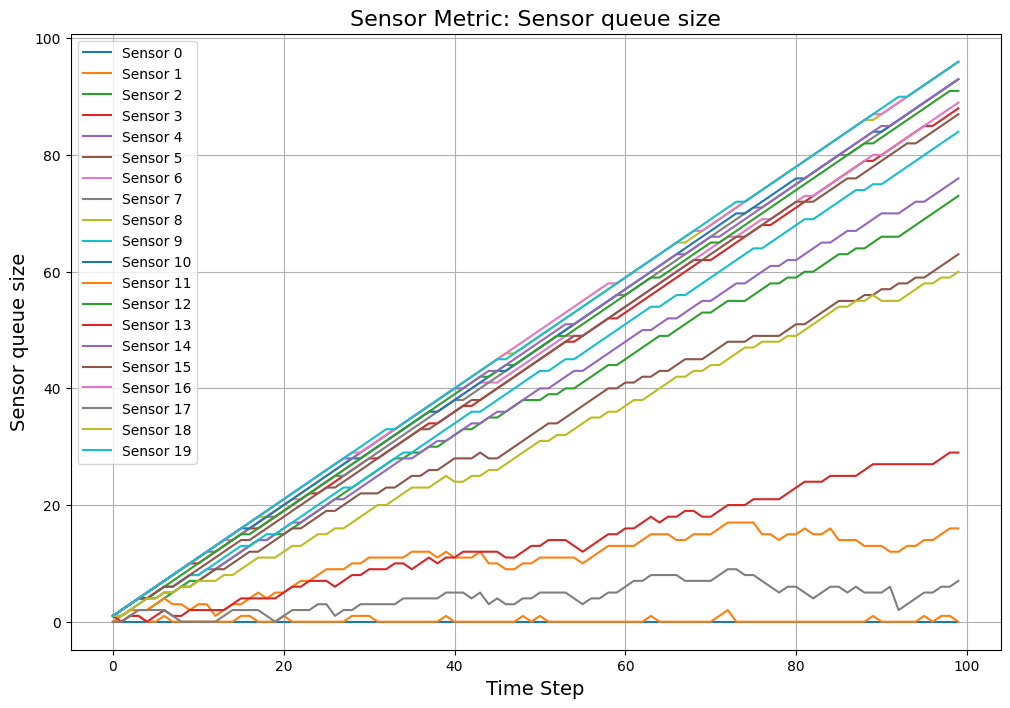

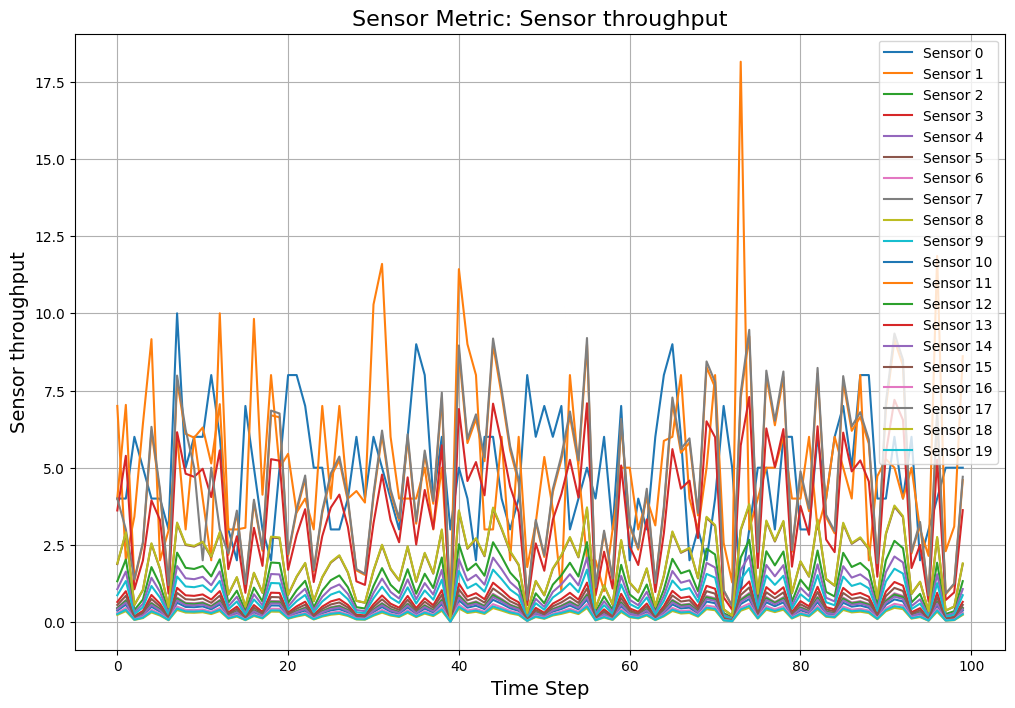

In [22]:
import matplotlib.pyplot as plt

def plot_sensor_metrics(ss_results):
    required_metrics = ["sensor throughput", "sensor queue size"]
    available_metrics = [metric for metric in ss_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_sensor_metrics(ss_results)

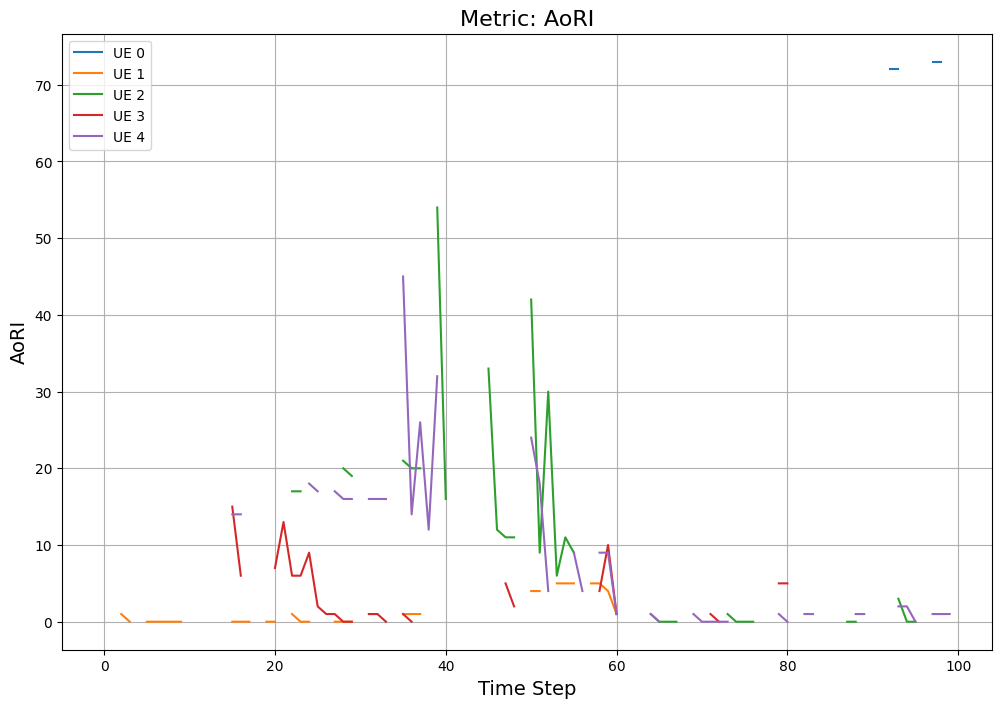

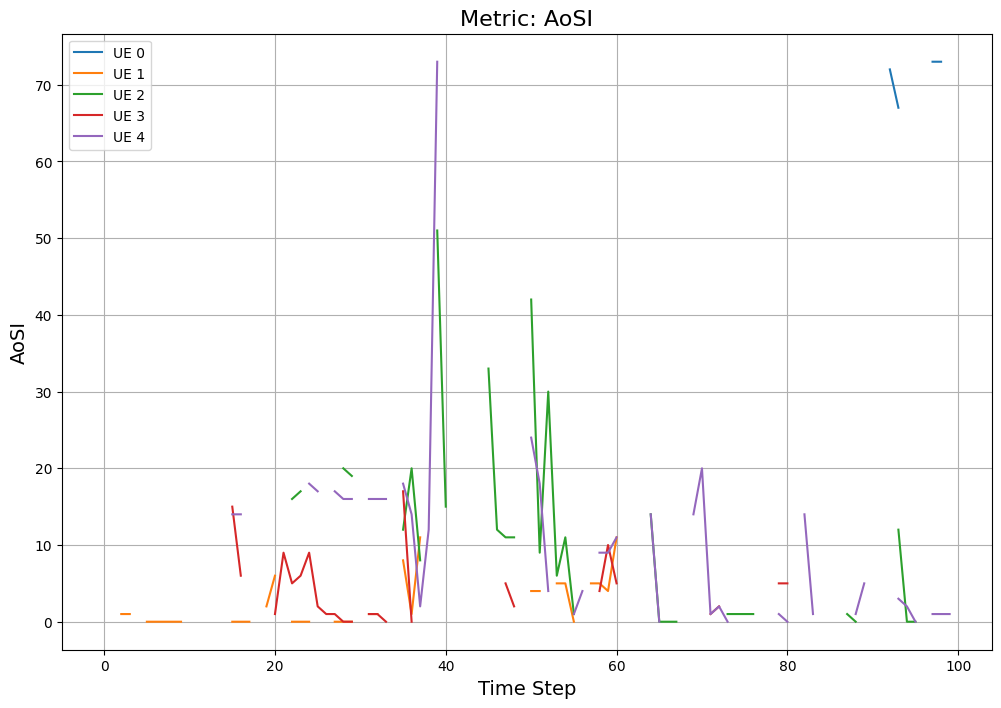

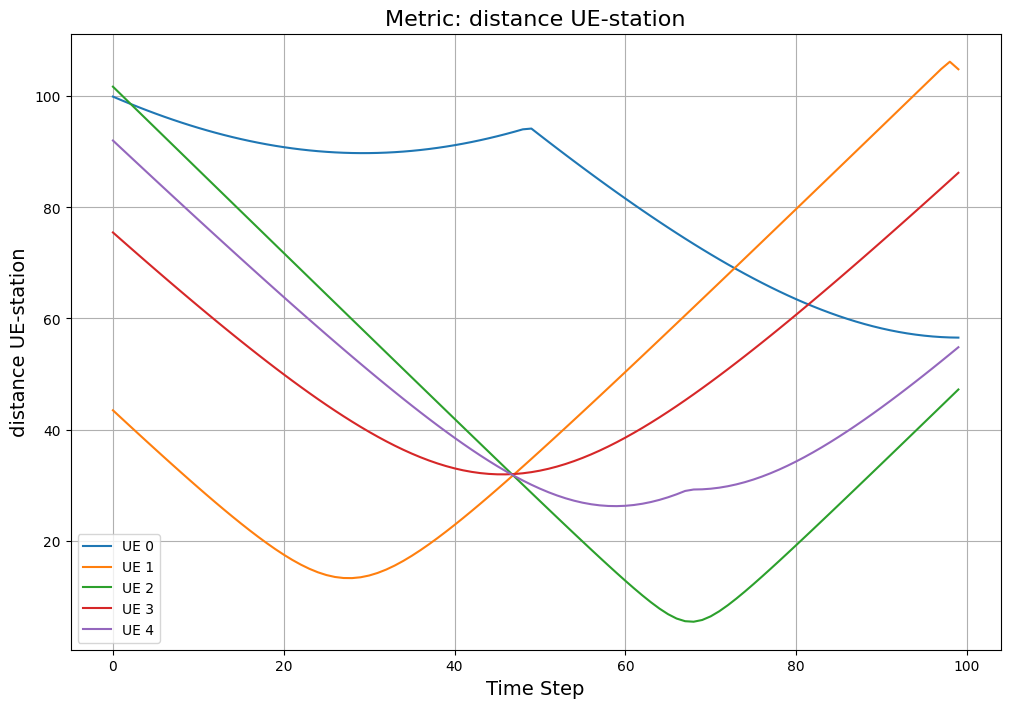

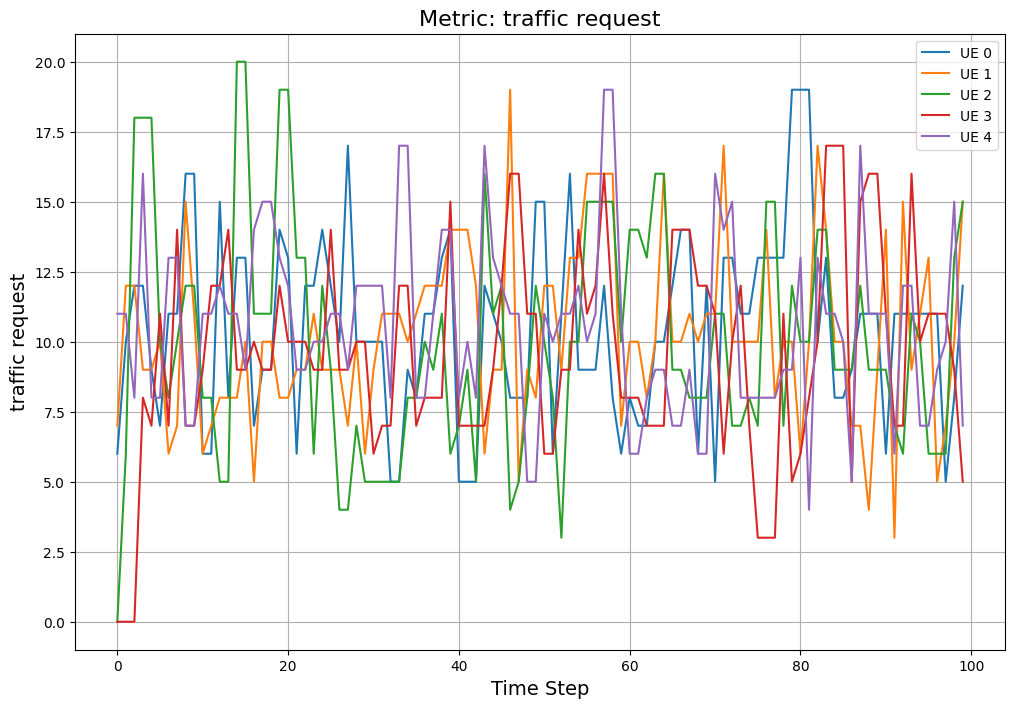

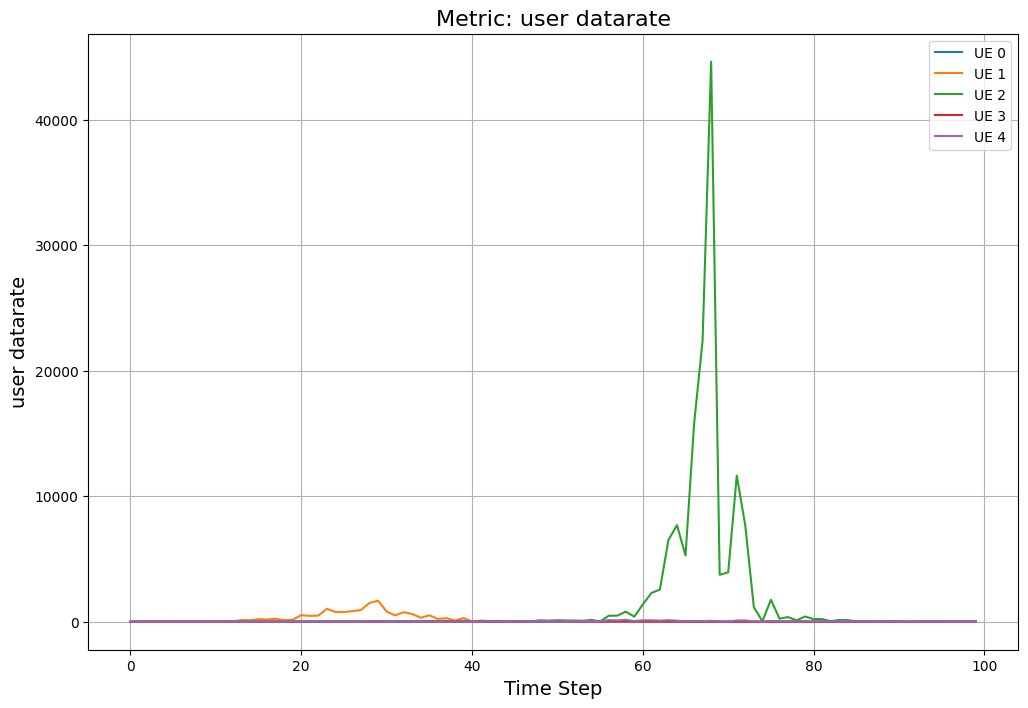

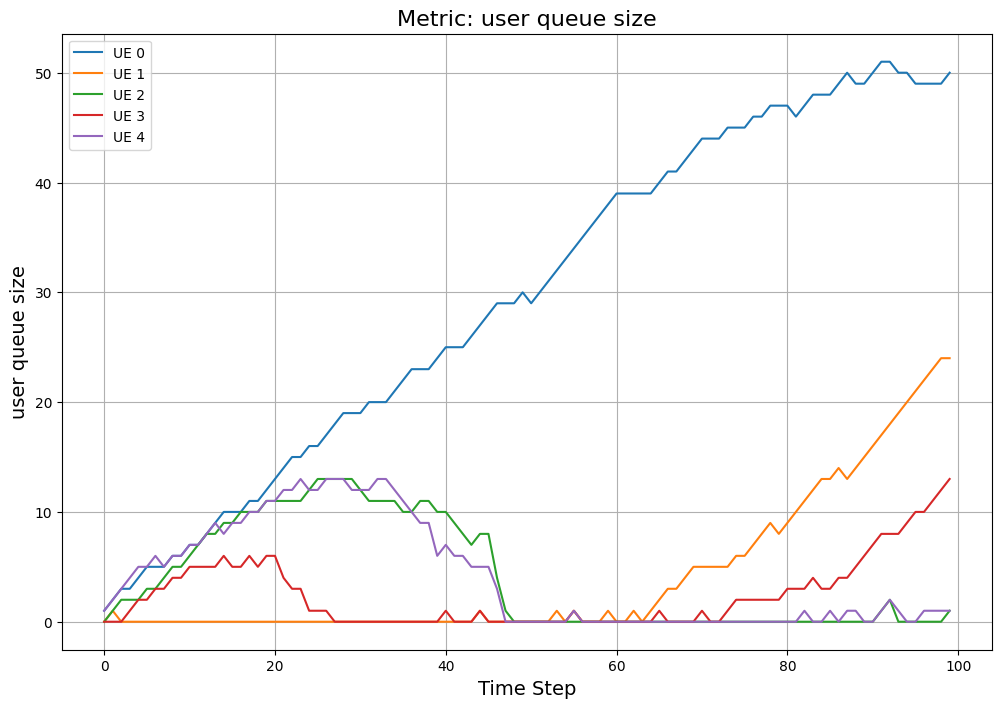

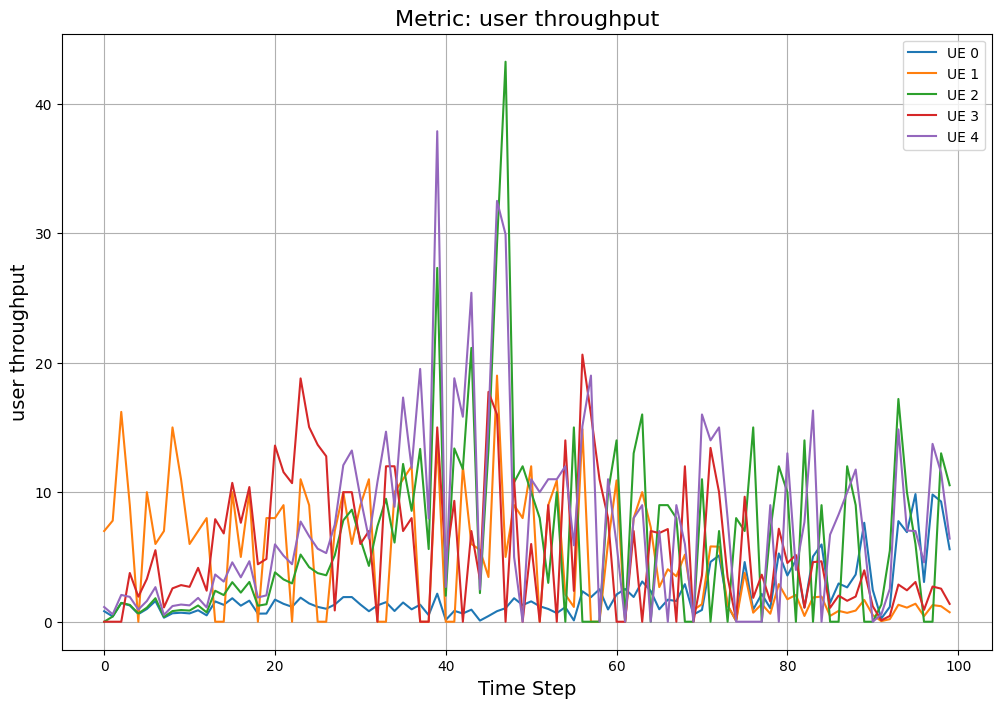

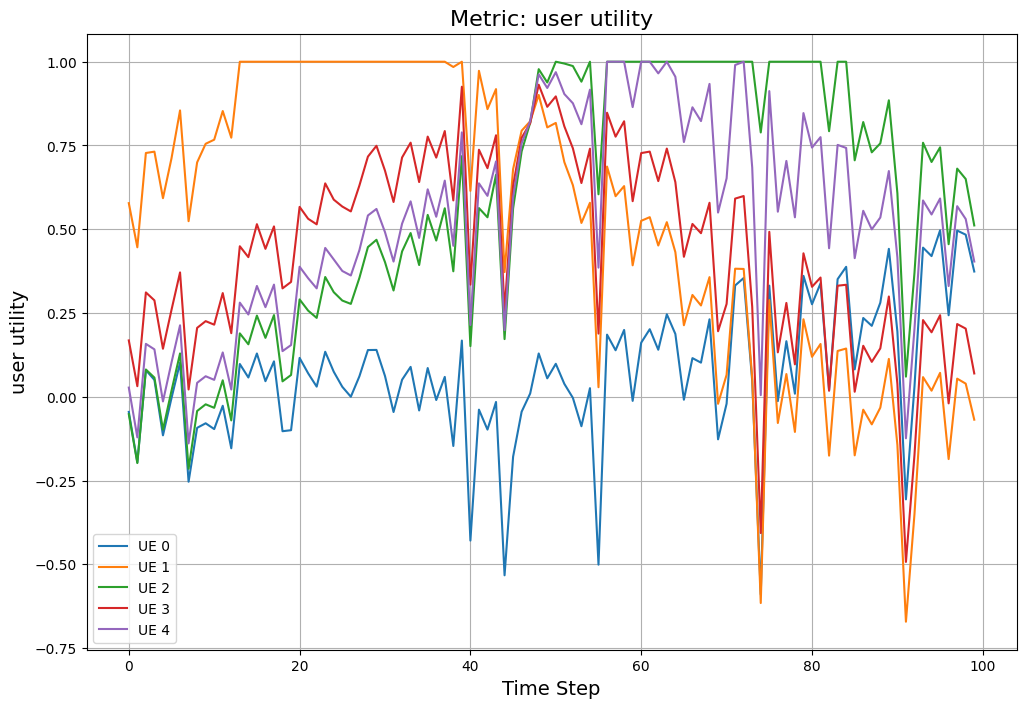

In [23]:
import matplotlib.pyplot as plt

def plot_all_ue_metrics(ue_results):
    for metric in ue_results.columns:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
        
        plt.title(f"Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_ue_metrics(ue_results)

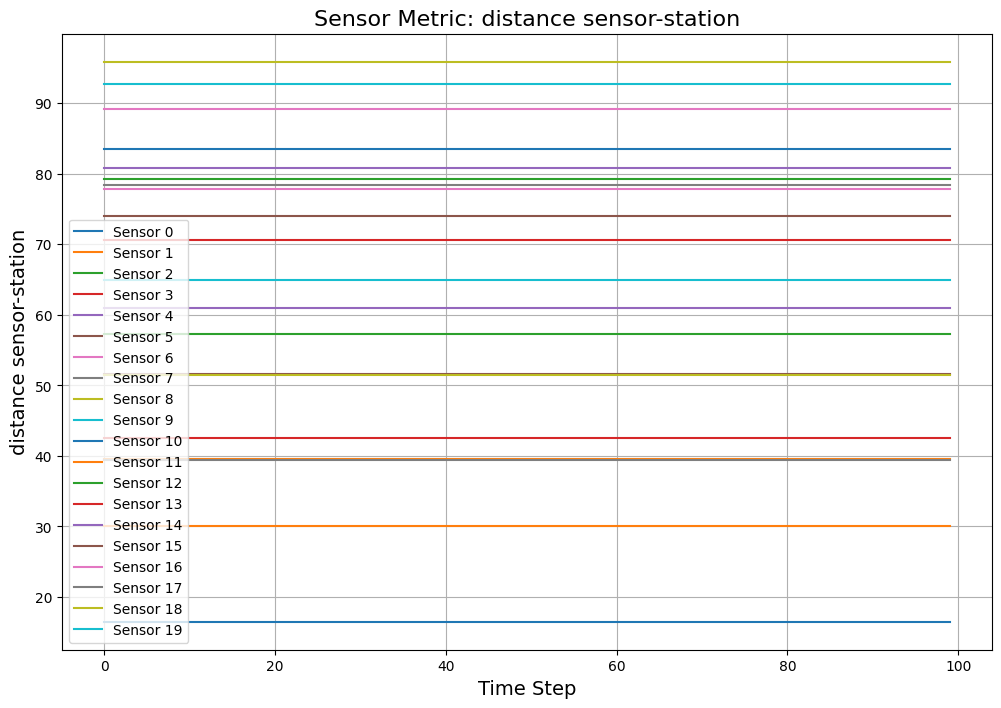

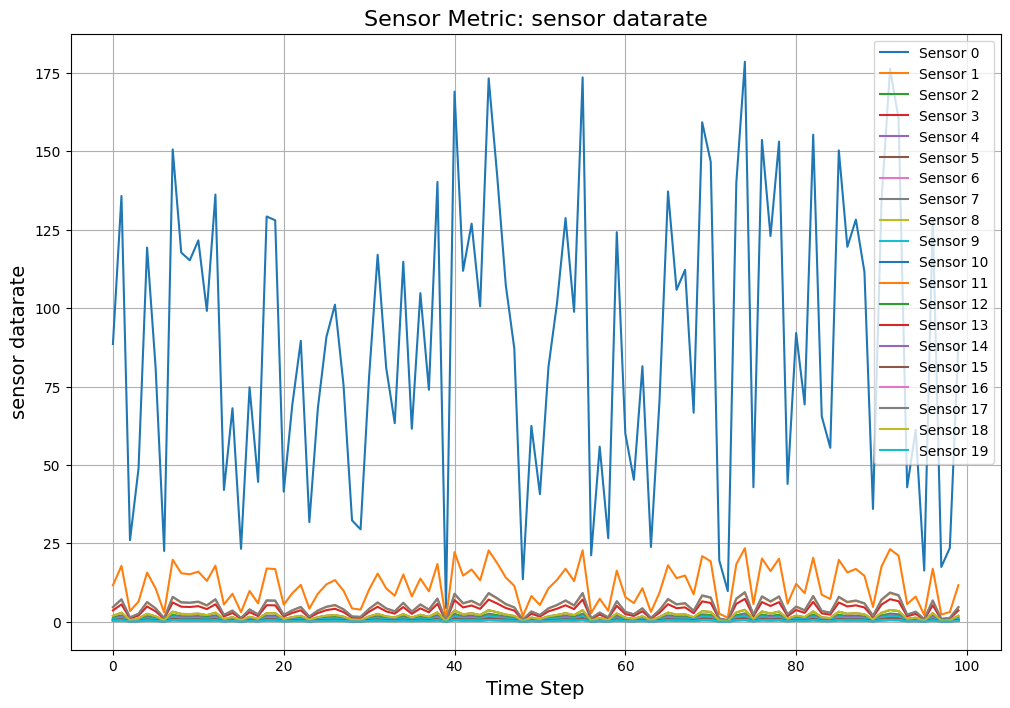

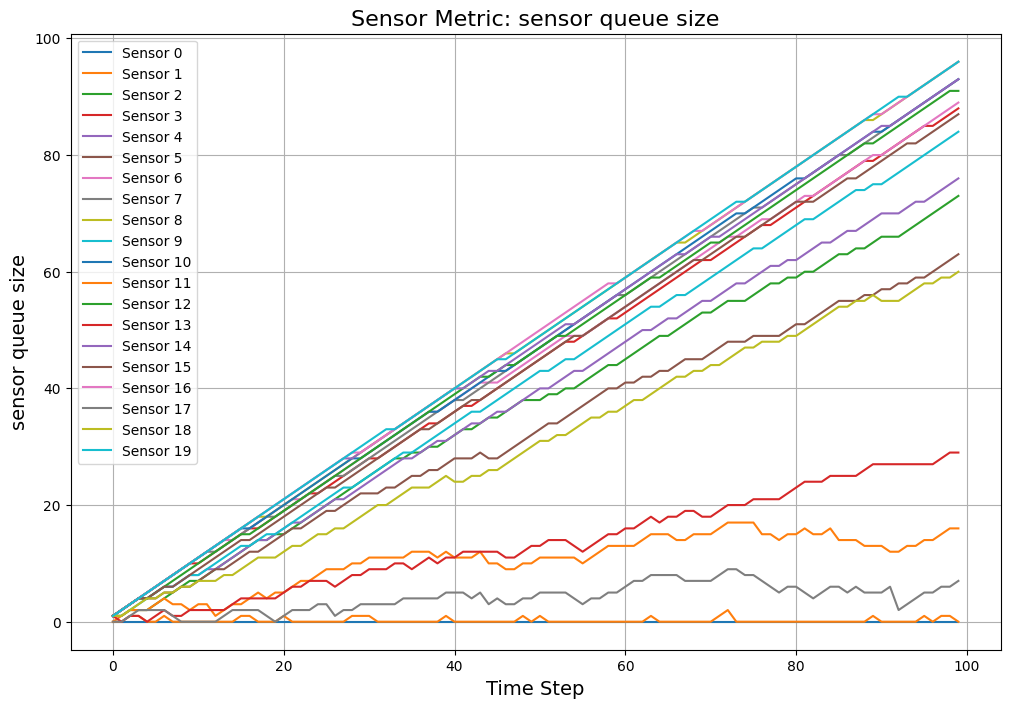

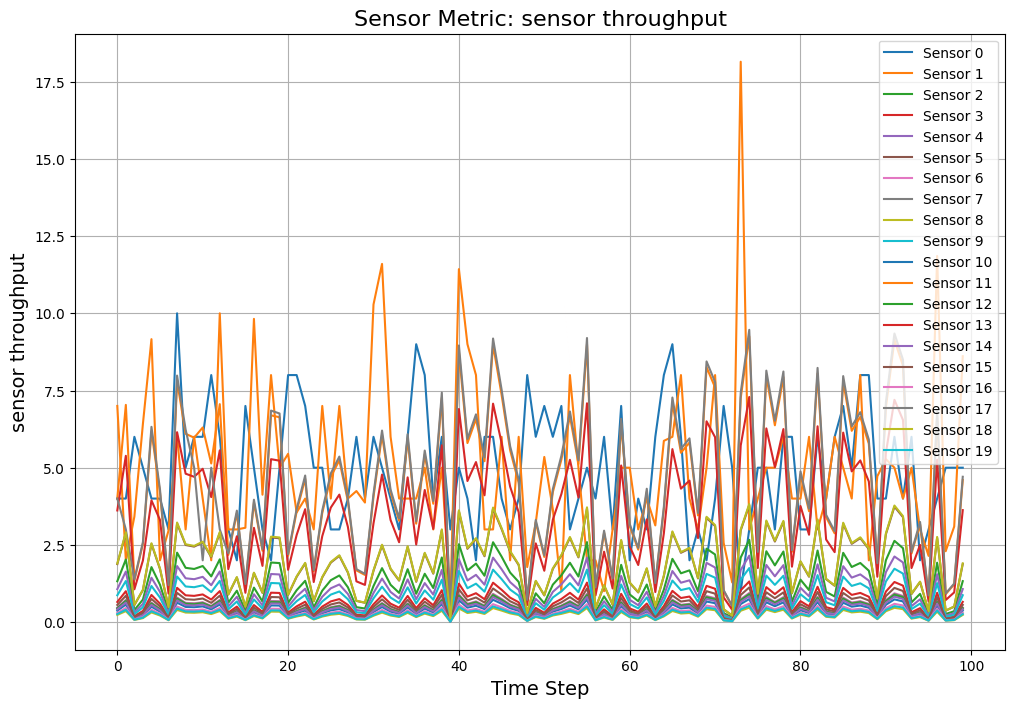

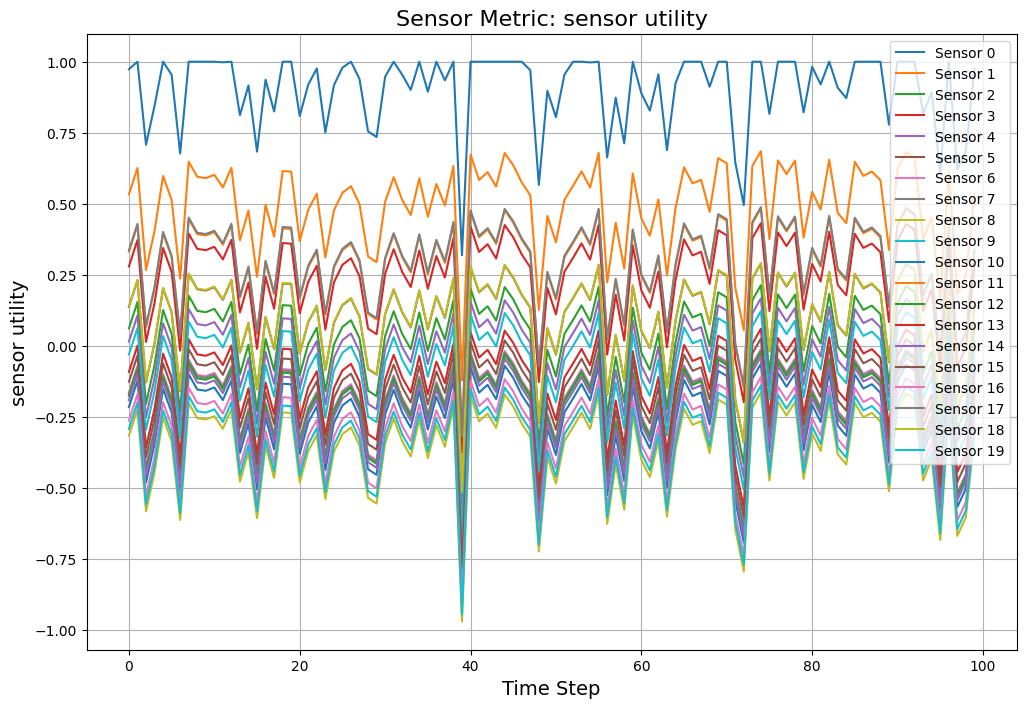

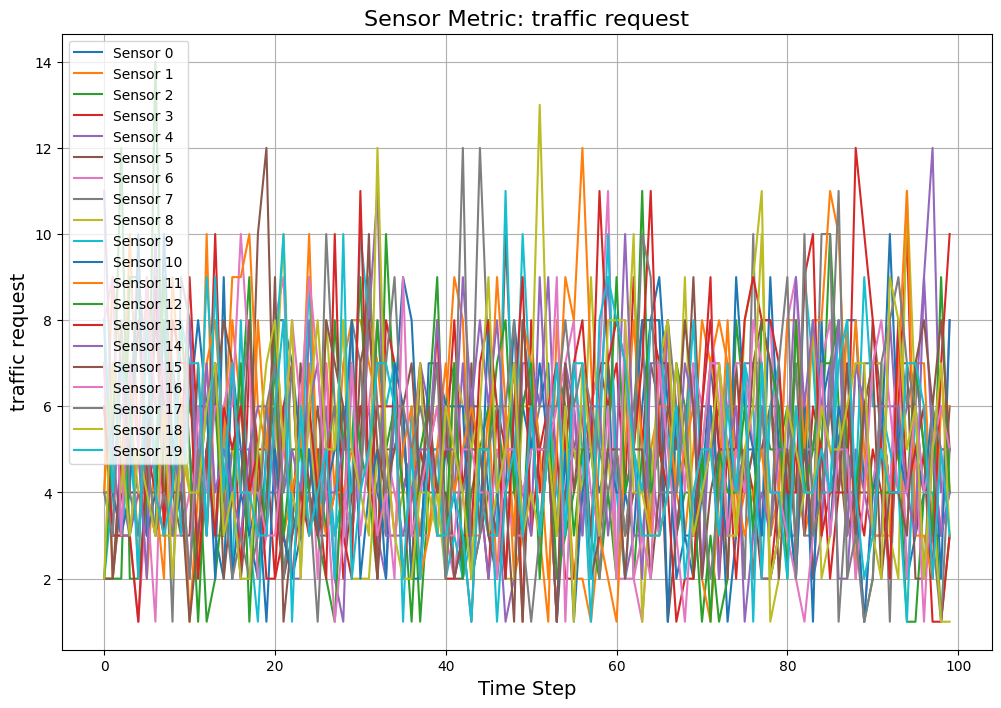

In [24]:
import matplotlib.pyplot as plt

def plot_all_sensor_metrics(ss_results):
    for metric in ss_results.columns:
        plt.figure(figsize=(12, 8))
    
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_sensor_metrics(ss_results)